### 1. Data Overview

The purpose of this notebook is to download, assess, and explore the data that will be worked with in this Neurocognitive psychology project. The dataset used is the Autism Brain Imaging Data Exchange I ([ABIDE I](http://fcon_1000.projects.nitrc.org/indi/abide/abide_I.html)) dataset. ABIDE I was developed as part of the 1000 Functional Connectomes Project, to further encourage discovery science on the brain connectome in Autism Spectrum Disorder. This dataset consists of MRI data of patients with and without Autism, from various different sites around the world. From this dataset we will be using the anatomical data, and the [CSV](https://www.nitrc.org/ir/app/template/XDATScreen_report_xnat_projectData.vm/search_element/xnat:projectData/search_field/xnat:projectData.ID/search_value/ABIDE) file with all phenotypic information for the participants.  

#### *1.1. Loading the data*

Access to the ABIDE I dataset is granted through the [NITRC website](https://www.nitrc.org/projects/fcon_1000/?feedback=Your%20request%20has%20been%20submitted.), a website where Neuroimaging Tools and Resources are shared. Here we can find the phenotpyic CSV file. Before downloading the actual brain images, it is important to get a general overview of what data and phenotypic information we are dealing with. To do this, we begin by downloading the .csv file, and reading it as a dataframe using pandas.  

In [3]:
from os import chdir

chdir('/Users/gretivan/Desktop/Neuro_data')

In [122]:
import pandas as pd

Data_overview = pd.read_csv("Data_overview.csv")
Data_overview

Unnamed: 0  Unnamed: 0.1  SUB_ID     X  subject  SITE_ID  \
0              0             1   50002     1    50002     PITT   
1              1             2   50003     2    50003     PITT   
2              2             3   50004     3    50004     PITT   
3              3             4   50005     4    50005     PITT   
4              4             5   50006     5    50006     PITT   
...          ...           ...     ...   ...      ...      ...   
1107        1107          1108   51583  1108    51583      SBL   
1108        1108          1109   51584  1109    51584      SBL   
1109        1109          1110   51585  1110    51585      SBL   
1110        1110          1111   51606  1111    51606  MAX_MUN   
1111        1111          1112   51607  1112    51607  MAX_MUN   

               FILE_ID  DX_GROUP  DSM_IV_TR  AGE_AT_SCAN  ...  \
0          no_filename         1          1        16.77  ...   
1         Pitt_0050003         1          1        24.45  ...   
2         Pitt_0050004         1          1        19.09  ...   
3         Pitt_0050005         1          1        13.73  ...   
4         Pitt_0050006         1          1        13.37  ...   
...                ...       ...        ...          ...  ...   
1107       SBL_0051583         1          2        35.00  ...   
1108       SBL_0051584         1          2        49.00  ...   
1109       SBL_0051585         1          1        27.00  ...   
1110  MaxMun_a_0051606         1          2        29.00  ...   
1111  MaxMun_a_0051607         1          2        26.00  ...   

      qc_notes_rater_1 qc_anat_rater_2  qc_anat_notes_rater_2  \
0                  NaN              OK                    NaN   
1                  NaN              OK                    NaN   
2                  NaN              OK                    NaN   
3                  NaN              OK                    NaN   
4                  NaN              OK                    NaN   
...                ...             ...                    ...   
1107               NaN              OK                    NaN   
1108               NaN              OK                    NaN   
1109               NaN              OK                    NaN   
1110               NaN              OK                    NaN   
1111               NaN              OK                    NaN   

      qc_func_rater_2        qc_func_notes_rater_2  qc_anat_rater_3  \
0                fail       ic-parietal-cerebellum               OK   
1                  OK                          NaN               OK   
2                  OK                          NaN               OK   
3               maybe       ic-parietal-cerebellum               OK   
4               maybe           ic-parietal slight               OK   
...               ...                          ...              ...   
1107               OK  ic-cerebellum-temporal_lobe               OK   
1108            maybe                vmpfc dropout               OK   
1109            maybe  ic-cerebellum-temporal_lobe               OK   
1110            maybe                ic-cerebellum               OK   
1111            maybe                ic-cerebellum               OK   

     qc_anat_notes_rater_3 qc_func_rater_3 qc_func_notes_rater_3  SUB_IN_SMP  
0                      NaN            fail             ERROR #24           1  
1                      NaN              OK                   NaN           1  
2                      NaN              OK                   NaN           1  
3                      NaN              OK                   NaN           0  
4                      NaN              OK                   NaN           1  
...                    ...             ...                   ...         ...  
1107                   NaN              OK                   NaN           0  
1108                   NaN              OK                   NaN           0  
1109                   NaN              OK                   NaN           0  
1110    

We can see here that there are 1112 subjects in this dataset, with 106 pieces of phenotypic information. At first glance, there appear to be various NaNs, though these all fall within columns which are not needed for the planed analysis.  

In [5]:
Data_overview.shape

(1112, 106)

In [6]:
Data_overview.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'SUB_ID', 'X', 'subject', 'SITE_ID',
       'FILE_ID', 'DX_GROUP', 'DSM_IV_TR', 'AGE_AT_SCAN',
       ...
       'qc_notes_rater_1', 'qc_anat_rater_2', 'qc_anat_notes_rater_2',
       'qc_func_rater_2', 'qc_func_notes_rater_2', 'qc_anat_rater_3',
       'qc_anat_notes_rater_3', 'qc_func_rater_3', 'qc_func_notes_rater_3',
       'SUB_IN_SMP'],
      dtype='object', length=106)

Here we can see what the different labels we are working with are. Important lables are SUB_ID, subject, FILE_ID, DX_GROUP, AGE_AT_SCAN and SEX. 

#### *1.2. Assessing the demographics*

We now want to look at the demographic information to establish wheter we are working with even groups. Since the goal of this data analysis is to see whether machine learning can predict whether an image is from a male or female participant, from an autistic or a control participant, or both, it is important to make sure the training sets are of equal sizes. 

In [7]:
Data_overview.describe()

Unnamed: 0  Unnamed: 0.1        SUB_ID            X       subject  \
count  1112.000000   1112.000000   1112.000000  1112.000000   1112.000000   
mean    555.500000    556.500000  50752.684353   556.500000  50752.684353   
std     321.151055    321.151055    447.680666   321.151055    447.680666   
min       0.000000      1.000000  50002.000000     1.000000  50002.000000   
25%     277.750000    278.750000  50354.750000   278.750000  50354.750000   
50%     555.500000    556.500000  50724.500000   556.500000  50724.500000   
75%     833.250000    834.250000  51153.250000   834.250000  51153.250000   
max    1111.000000   1112.000000  51607.000000  1112.000000  51607.000000   

          DX_GROUP    DSM_IV_TR  AGE_AT_SCAN          SEX  HANDEDNESS_SCORES  \
count  1112.000000  1112.000000  1112.000000  1112.000000         370.000000   
mean      1.515288  -646.819245    17.048864     1.147482        -102.560892   
std       0.499991  2461.828856     8.036419     0.354745        1273.177790   
min       1.000000 -9999.000000     6.470000     1.000000       -9999.000000   
25%       1.000000     0.000000    11.658575     1.000000          48.000000   
50%       2.000000     0.000000    14.660000     1.000000          75.000000   
75%       2.000000     1.000000    20.085000     1.000000          91.000000   
max       2.000000     4.000000    64.000000     2.000000         100.000000   

       ...    func_fber    func_fwhm   func_dvars  func_outlier  func_quality  \
count  ...  1099.000000  1099.000000  1099.000000   1099.000000   1099.000000   
mean   ...   100.548498     2.116388     1.103531      0.005525      0.012778   
std    ...    43.552970     0.345282     0.117803      0.006464      0.011212   
min    ...    33.836513     1.581108     0.709671      0.000182      0.001693   
25%    ...    69.047209     1.862772     1.026977      0.001124      0.006333   
50%    ...    87.681334     2.004123     1.080727      0.003441      0.010043   
75%    ...   125.779269     2.328370     1.172068      0.006977      0.015189   
max    ...   326.544102     3.753481     1.571101      0.080158      0.098614   

       func_mean_fd  func_num_fd  func_perc_fd     func_gsr   SUB_IN_SMP  
count   1099.000000  1099.000000   1099.000000  1099.000000  1112.000000  
mean       0.131138    27.218380     12.952826     0.028416     0.686151  
std        0.157728    42.757583     18.216671     0.021070     0.464265  
min        0.016117     0.000000      0.000000    -0.015812     0.000000  
25%        0.050888     2.000000      0.995025     0.013075     0.000000  
50%        0.083163     9.000000      4.972376     0.031102     1.000000  
75%        0.143479    33.000000     16.977985     0.042821     1.000000  
max        1.434912   288.000000     91.735537     0.104225     1.000000  

[8 rows x 87 columns]

We can see here that the proportions of Autistic to control participants are relatively even. Since they are coded 1 (ASD) and 2 (Control) we would expect and even split to have a mean of around 1.5. Here we have a mean for the DX_GROUP of 1.51 so this is great. For the Sex group however, which is also coded 1 (Male) and 2 (Female), we are working with a very uneven split as seen in the mean of 1.15. 

We can double check these individually as well to make sure that we are correct in this interpretation.

In [8]:
control = Data_overview.loc[Data_overview['DX_GROUP']==2]
control

Unnamed: 0  Unnamed: 0.1  SUB_ID     X  subject SITE_ID       FILE_ID  \
26            26            27   50030    27    50030    PITT  Pitt_0050030   
27            27            28   50031    28    50031    PITT  Pitt_0050031   
28            28            29   50032    29    50032    PITT  Pitt_0050032   
29            29            30   50033    30    50033    PITT  Pitt_0050033   
30            30            31   50034    31    50034    PITT  Pitt_0050034   
...          ...           ...     ...   ...      ...     ...           ...   
1090        1090          1091   51566  1091    51566     SBL   SBL_0051566   
1091        1091          1092   51567  1092    51567     SBL   SBL_0051567   
1092        1092          1093   51568  1093    51568     SBL   SBL_0051568   
1093        1093          1094   51569  1094    51569     SBL   SBL_0051569   
1094        1094          1095   51570  1095    51570     SBL   SBL_0051570   

      DX_GROUP  DSM_IV_TR  AGE_AT_SCAN  ...  qc_notes_rater_1 qc_anat_rater_2  \
26           2          0        25.12  ...               NaN              OK   
27           2          0        12.92  ...               NaN              OK   
28           2          0        19.80  ...               NaN              OK   
29           2          0        12.15  ...               NaN              OK   
30           2          0        14.77  ...               NaN              OK   
...        ...        ...          ...  ...               ...             ...   
1090         2          0        41.00  ...               NaN              OK   
1091         2          0        34.00  ...               NaN              OK   
1092         2          0        37.00  ...               NaN              OK   
1093         2          0        36.00  ...               NaN              OK   
1094         2          0        42.00  ...               NaN              OK   

      qc_anat_notes_rater_2  qc_func_rater_2        qc_func_notes_rater_2  \
26                      NaN            maybe       ic-parietal-cerebellum   
27                      NaN            maybe  ic-cerebellum_temporal_lobe   
28                      NaN            maybe  ic-cerebellum_temporal_lobe   
29                      NaN            maybe  ic-cerebellum_temporal_lobe   
30                      NaN            maybe  ic-cerebellum_temporal_lobe   
...                     ...              ...                          ...   
1090                    NaN            maybe  ic-cerebellum-temporal_lobe   
1091                    NaN            maybe  ic-cerebellum-temporal_lobe   
1092                    NaN            maybe  ic-cerebellum-temporal_lobe   
1093                    NaN            maybe  ic-cerebellum-temporal_lobe   
1094                    NaN            maybe  ic-cerebellum-temporal_lobe   

      qc_anat_rater_3 qc_anat_notes_rater_3 qc_func_rater_3  \
26                 OK                   NaN              OK   
27                 OK                   NaN              OK   
28                 OK                   NaN              OK   
29                 OK                   NaN              OK   
30                 OK                   NaN              OK   
...               ...                   ...             ...   
1090               OK                   NaN              OK   
1091               OK                   NaN              OK   
1092               OK                   NaN              OK   
1093               OK                   NaN              OK   
1094               OK                   NaN              OK   

     qc_func_notes_rater_3  SUB_IN_SMP  
26                     NaN           1  
27                     NaN           1  
28                     NaN           1  
29                     NaN           1  
30                     NaN           1  
...                    ...         ...  
1090                   NaN           0  
1091                   NaN           0  
1092                   NaN       

In [9]:
asd = Data_overview.loc[Data_overview['DX_GROUP']==1]
asd

Unnamed: 0  Unnamed: 0.1  SUB_ID     X  subject  SITE_ID  \
0              0             1   50002     1    50002     PITT   
1              1             2   50003     2    50003     PITT   
2              2             3   50004     3    50004     PITT   
3              3             4   50005     4    50005     PITT   
4              4             5   50006     5    50006     PITT   
...          ...           ...     ...   ...      ...      ...   
1107        1107          1108   51583  1108    51583      SBL   
1108        1108          1109   51584  1109    51584      SBL   
1109        1109          1110   51585  1110    51585      SBL   
1110        1110          1111   51606  1111    51606  MAX_MUN   
1111        1111          1112   51607  1112    51607  MAX_MUN   

               FILE_ID  DX_GROUP  DSM_IV_TR  AGE_AT_SCAN  ...  \
0          no_filename         1          1        16.77  ...   
1         Pitt_0050003         1          1        24.45  ...   
2         Pitt_0050004         1          1        19.09  ...   
3         Pitt_0050005         1          1        13.73  ...   
4         Pitt_0050006         1          1        13.37  ...   
...                ...       ...        ...          ...  ...   
1107       SBL_0051583         1          2        35.00  ...   
1108       SBL_0051584         1          2        49.00  ...   
1109       SBL_0051585         1          1        27.00  ...   
1110  MaxMun_a_0051606         1          2        29.00  ...   
1111  MaxMun_a_0051607         1          2        26.00  ...   

      qc_notes_rater_1 qc_anat_rater_2  qc_anat_notes_rater_2  \
0                  NaN              OK                    NaN   
1                  NaN              OK                    NaN   
2                  NaN              OK                    NaN   
3                  NaN              OK                    NaN   
4                  NaN              OK                    NaN   
...                ...             ...                    ...   
1107               NaN              OK                    NaN   
1108               NaN              OK                    NaN   
1109               NaN              OK                    NaN   
1110               NaN              OK                    NaN   
1111               NaN              OK                    NaN   

      qc_func_rater_2        qc_func_notes_rater_2  qc_anat_rater_3  \
0                fail       ic-parietal-cerebellum               OK   
1                  OK                          NaN               OK   
2                  OK                          NaN               OK   
3               maybe       ic-parietal-cerebellum               OK   
4               maybe           ic-parietal slight               OK   
...               ...                          ...              ...   
1107               OK  ic-cerebellum-temporal_lobe               OK   
1108            maybe                vmpfc dropout               OK   
1109            maybe  ic-cerebellum-temporal_lobe               OK   
1110            maybe                ic-cerebellum               OK   
1111            maybe                ic-cerebellum               OK   

     qc_anat_notes_rater_3 qc_func_rater_3 qc_func_notes_rater_3  SUB_IN_SMP  
0                      NaN            fail             ERROR #24           1  
1                      NaN              OK                   NaN           1  
2                      NaN              OK                   NaN           1  
3                      NaN              OK                   NaN           0  
4                      NaN              OK                   NaN           1  
...                    ...             ...                   ...         ...  
1107                   NaN              OK                   NaN           0  
1108                   NaN              OK                   NaN           0  
1109                   NaN              OK                   NaN           0  
1110    

As we can see here, we are correct in our above interpretation that the control and the ASD group are roughly even - with 573 control participants and 539 autistic participants. 

We can do the same thing to check whether the male and female groups are of even sizes. 

In [10]:
female = Data_overview.loc[Data_overview['SEX']==2]
female

Unnamed: 0  Unnamed: 0.1  SUB_ID     X  subject  SITE_ID  \
3              3             4   50005     4    50005     PITT   
19            19            20   50023    20    50023     PITT   
25            25            26   50029    26    50029     PITT   
32            32            33   50036    33    50036     PITT   
34            34            35   50038    35    50038     PITT   
...          ...           ...     ...   ...      ...      ...   
1065        1065          1066   51479  1066    51479  CALTECH   
1066        1066          1067   51480  1067    51480  CALTECH   
1068        1068          1069   51482  1069    51482  CALTECH   
1079        1079          1080   51493  1080    51493  CALTECH   
1110        1110          1111   51606  1111    51606  MAX_MUN   

               FILE_ID  DX_GROUP  DSM_IV_TR  AGE_AT_SCAN  ...  \
3         Pitt_0050005         1          1        13.73  ...   
19        Pitt_0050023         1          1        12.64  ...   
25        Pitt_0050029         1          1        11.40  ...   
32        Pitt_0050036         2          0        13.28  ...   
34        Pitt_0050038         2          0        13.95  ...   
...                ...       ...        ...          ...  ...   
1065   Caltech_0051479         2          0        20.00  ...   
1066   Caltech_0051480         2          0        20.80  ...   
1068   Caltech_0051482         2          0        21.10  ...   
1079   Caltech_0051493         2          0        29.20  ...   
1110  MaxMun_a_0051606         1          2        29.00  ...   

      qc_notes_rater_1 qc_anat_rater_2  qc_anat_notes_rater_2  \
3                  NaN              OK                    NaN   
19                 NaN              OK                    NaN   
25                 NaN           maybe    skull-striping fail   
32                 NaN              OK                    NaN   
34                 NaN              OK                    NaN   
...                ...             ...                    ...   
1065               NaN              OK                    NaN   
1066               NaN              OK                    NaN   
1068               NaN              OK                    NaN   
1079               NaN              OK                    NaN   
1110               NaN              OK                    NaN   

      qc_func_rater_2        qc_func_notes_rater_2  qc_anat_rater_3  \
3               maybe       ic-parietal-cerebellum               OK   
19              maybe  ic-cerebellum_temporal_lobe               OK   
25               fail       ic-parietal-cerebellum               OK   
32              maybe                ic-cerebellum               OK   
34                 OK                          NaN               OK   
...               ...                          ...              ...   
1065            maybe            Ic-parietal-minor               OK   
1066               OK                          NaN               OK   
1068            maybe            Ic-parietal-minor               OK   
1079            maybe            Ic-parietal-minor               OK   
1110            maybe                ic-cerebellum               OK   

     qc_anat_notes_rater_3 qc_func_rater_3 qc_func_notes_rater_3  SUB_IN_SMP  
3                      NaN              OK                   NaN           0  
19                     NaN              OK                   NaN           0  
25                     NaN              OK                   NaN           0  
32                     NaN              OK                   NaN           0  
34                     NaN              OK                   NaN           0  
...                    ...             ...                   ...         ...  
1065                   NaN              OK                   NaN           0  
1066                   NaN              OK                   NaN           0  
1068                   NaN              OK                   NaN           0  
1079    

In [11]:
male = Data_overview.loc[Data_overview['SEX']==1]
male

Unnamed: 0  Unnamed: 0.1  SUB_ID     X  subject  SITE_ID  \
0              0             1   50002     1    50002     PITT   
1              1             2   50003     2    50003     PITT   
2              2             3   50004     3    50004     PITT   
4              4             5   50006     5    50006     PITT   
5              5             6   50007     6    50007     PITT   
...          ...           ...     ...   ...      ...      ...   
1106        1106          1107   51582  1107    51582      SBL   
1107        1107          1108   51583  1108    51583      SBL   
1108        1108          1109   51584  1109    51584      SBL   
1109        1109          1110   51585  1110    51585      SBL   
1111        1111          1112   51607  1112    51607  MAX_MUN   

               FILE_ID  DX_GROUP  DSM_IV_TR  AGE_AT_SCAN  ...  \
0          no_filename         1          1        16.77  ...   
1         Pitt_0050003         1          1        24.45  ...   
2         Pitt_0050004         1          1        19.09  ...   
4         Pitt_0050006         1          1        13.37  ...   
5         Pitt_0050007         1          1        17.78  ...   
...                ...       ...        ...          ...  ...   
1106       SBL_0051582         1          2        31.00  ...   
1107       SBL_0051583         1          2        35.00  ...   
1108       SBL_0051584         1          2        49.00  ...   
1109       SBL_0051585         1          1        27.00  ...   
1111  MaxMun_a_0051607         1          2        26.00  ...   

      qc_notes_rater_1 qc_anat_rater_2  qc_anat_notes_rater_2  \
0                  NaN              OK                    NaN   
1                  NaN              OK                    NaN   
2                  NaN              OK                    NaN   
4                  NaN              OK                    NaN   
5                  NaN              OK                    NaN   
...                ...             ...                    ...   
1106               NaN              OK                    NaN   
1107               NaN              OK                    NaN   
1108               NaN              OK                    NaN   
1109               NaN              OK                    NaN   
1111               NaN              OK                    NaN   

      qc_func_rater_2        qc_func_notes_rater_2  qc_anat_rater_3  \
0                fail       ic-parietal-cerebellum               OK   
1                  OK                          NaN               OK   
2                  OK                          NaN               OK   
4               maybe           ic-parietal slight               OK   
5               maybe   ic-cerebellum_temporal_lob               OK   
...               ...                          ...              ...   
1106            maybe                ic-cerebellum               OK   
1107               OK  ic-cerebellum-temporal_lobe               OK   
1108            maybe                vmpfc dropout               OK   
1109            maybe  ic-cerebellum-temporal_lobe               OK   
1111            maybe                ic-cerebellum               OK   

     qc_anat_notes_rater_3 qc_func_rater_3 qc_func_notes_rater_3  SUB_IN_SMP  
0                      NaN            fail             ERROR #24           1  
1                      NaN              OK                   NaN           1  
2                      NaN              OK                   NaN           1  
4                      NaN              OK                   NaN           1  
5                      NaN              OK                   NaN           1  
...                    ...             ...                   ...         ...  
1106                   NaN              OK                   NaN           0  
1107                   NaN              OK                   NaN           0  
1108                   NaN              OK                   NaN           0  
1109    

There are 164 female participants, and 948 male participants. This again reiterates the uneven split we suggested above. 

We can visualise this as well. 

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

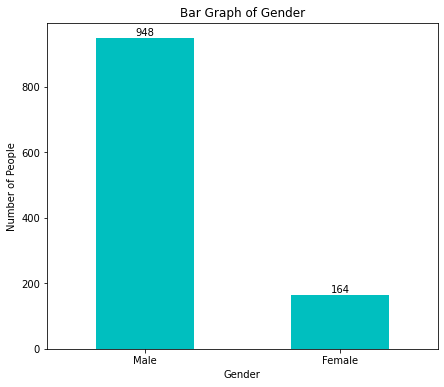

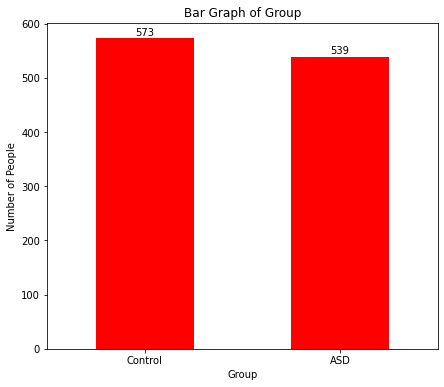

In [13]:
gender = Data_overview['SEX'].value_counts()
plt.figure(figsize=(7, 6))

ax = gender.plot(kind='bar', rot=0, color="c")
ax.set_title("Bar Graph of Gender", y = 1)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of People')
ax.set_xticklabels(('Male', 'Female'))


for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    

group = Data_overview['DX_GROUP'].value_counts()
plt.figure(figsize=(7, 6))
    
ax = group.plot(kind='bar', rot=0, color="red")
ax.set_title("Bar Graph of Group", y = 1)
ax.set_xlabel('Group')
ax.set_ylabel('Number of People')
ax.set_xticklabels(('Control', 'ASD'))


for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()




####  *1.3. Matching*

As we saw above, we are working with very uneven groups in terms of gender. The ASD and control participant split seems fine thus this doesn't require any alteration. However, in order to avoid any biases from the male group, we will create a matched pair sample instead, with one male participant being matched to a female participant based on whether they are in the ASD/control group and on their age. To do this we will use numpy.

In [14]:
import numpy as np

In [15]:
def find_matching (female_df, male_df):
    matched_list_asd, matched_list_control = [],[]
    
    for group in [1, 2]:
        female_group = female_df[female_df['DX_GROUP']==group]
        male_group = male_df[male_df['DX_GROUP']==group]
        
        age_male = male_group['AGE_AT_SCAN'].to_numpy()
        id_male = male_group['subject']
        used_male = []
    
        for index, row in female_group.iterrows():
            age_female = row['AGE_AT_SCAN']
            min_dif = np.argsort(np.abs(age_male - age_female))
            matched_idx = min_dif[0]

            if matched_idx in used_male:
                counter = 0
                while matched_idx in used_male: 
                    counter += 1
                    matched_idx = min_dif[counter]
                
            used_male.append(matched_idx)
                    
            if group == 1:
                matched_list_asd.append([row['subject'], id_male.iloc[matched_idx]])
            else:
                matched_list_control.append([row['subject'], id_male.iloc[matched_idx]])

    return matched_list_asd, matched_list_control


In [16]:
matched_list_asd, matched_list_control = find_matching(female, male)

Here we are defining a function which aims to create two matched lists. In both lists, one male participant is being assigned, or matched, with a female participant based on the group they are in and their age. So for every female participant, there is a male participant who is of the same age and in the same group.

In [17]:
print(matched_list_asd)

[[50005, 50243], [50023, 50148], [50029, 50823], [50057, 50191], [50119, 50686], [50125, 50652], [50127, 50411], [50185, 51236], [50276, 50273], [50278, 50805], [50284, 50286], [50285, 50298], [50300, 50310], [50302, 51214], [50309, 50982], [50319, 50120], [50321, 50124], [50407, 50405], [50604, 50155], [50615, 51175], [50619, 50517], [50620, 50618], [50621, 50608], [50623, 51239], [50624, 50626], [50627, 50978], [50644, 50711], [50648, 51320], [50650, 51582], [50743, 50323], [50744, 50613], [50749, 50235], [50792, 50802], [50795, 51348], [50796, 50122], [50798, 50791], [50952, 51011], [50953, 50800], [50954, 50522], [50955, 50294], [50956, 51300], [50957, 51220], [50958, 50144], [50959, 51459], [50960, 50651], [50961, 50499], [50962, 50003], [51162, 50609], [51164, 50793], [51167, 51165], [51170, 50993], [51207, 50183], [51215, 51202], [51219, 50972], [51226, 50965], [51228, 51166], [51230, 51472], [51242, 50510], [51321, 51330], [51325, 50708], [51460, 50497], [51462, 51465], [51463,

In [18]:
print(matched_list_control)

[[50036, 50417], [50038, 50568], [50049, 50427], [50059, 51156], [50113, 50116], [50114, 51556], [50201, 50043], [50205, 50423], [50206, 50554], [50208, 50436], [50213, 51199], [50215, 51128], [50336, 51269], [50338, 51097], [50340, 50330], [50341, 50344], [50343, 51276], [50348, 51112], [50353, 51314], [50354, 50575], [50356, 50331], [50357, 51280], [50361, 50432], [50369, 50422], [50373, 50391], [50374, 50165], [50375, 50378], [50379, 51100], [50380, 50328], [50414, 51135], [50555, 51101], [50557, 51075], [50558, 51099], [50563, 50727], [50565, 50571], [50569, 50570], [50572, 51140], [50576, 50809], [50656, 50698], [50661, 50109], [50669, 51343], [50722, 50200], [50723, 50360], [50730, 50578], [50735, 50050], [50736, 50426], [50778, 50816], [50780, 51085], [50783, 50359], [50784, 51080], [50788, 50159], [50790, 51081], [50810, 51281], [50812, 50817], [50820, 50164], [51036, 51069], [51038, 51183], [51039, 50814], [51040, 50777], [51041, 51082], [51042, 51083], [51044, 50773], [51045,

In [19]:
matched_list_asd_np =np.array(matched_list_asd)
matched_list_asd_np.shape

(65, 2)

In [20]:
matched_list_control_np =np.array(matched_list_control)
matched_list_control_np.shape

(99, 2)

We can see here that the list of controls is slightly longer than the list of participants with ASD. This deviation can later be controlled for during the analysis process. Since the difference is not too large, we shouldnt have too many issues. Note: when reading these lists we have to keep in mind that they are placed in arrays of two. This we have 130 participants with ASD, of which 65 are female and 65 are male, and 198 control participants of which 99 are male and 99 are female. 

#### *1.4. Visualizing*

It may be of interest to us to visualise this age matching in the two groups. 

In [21]:
def get_ages(male_df, female_df, matched_list):
    id_male_asd = male_df['subject'].to_numpy()
    id_female_asd = female_df['subject'].to_numpy()
    age_male = male_df['AGE_AT_SCAN'].to_numpy()
    age_female = female_df['AGE_AT_SCAN'].to_numpy()
    selected_female_age = []
    for female_id in matched_list[:, 0]:
        selected_female_age.append(age_female[np.where(id_female_asd == female_id)[0]])
    selected_female_age = np.array(selected_female_age)[:, 0]
    selected_male_age = []                         
    for male_id in matched_list[:, 1]:
        selected_male_age.append(age_male[np.where(id_male_asd == male_id)[0]])
    selected_male_age = np.array(selected_male_age)[:, 0]
    return selected_male_age, selected_female_age

In [22]:
selected_male_age_asd, selected_female_age_asd = get_ages(male, female, np.array(matched_list_asd))
selected_male_age_control, selected_female_age_control = get_ages(male, female, np.array(matched_list_control))

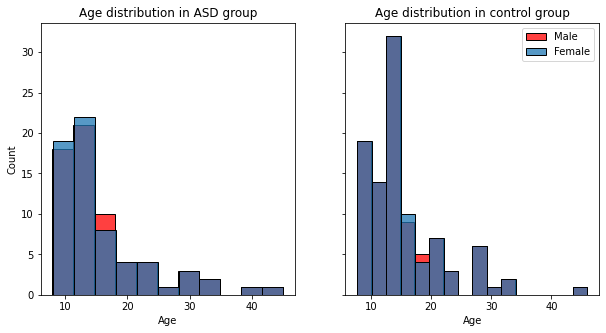

In [24]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))

sns.histplot(selected_male_age_asd, color='red', ax=axes[0])
sns.histplot(selected_female_age_asd, ax=axes[0])
axes[0].set_xlabel('Age')
axes[0].set_title('Age distribution in ASD group')

sns.histplot(selected_male_age_control, color='red', ax=axes[1])
sns.histplot(selected_female_age_control, ax=axes[1])
axes[1].set_xlabel('Age')
axes[1].set_title('Age distribution in control group')

plt.legend(labels=['Male', 'Female'])

plt.show()

We may also want to visualise how well our matching went. To do this we need to subtract the male ages from the female ages in the various groups. In theory we should get as little difference in age as possible to assure that we matched as well as we could. 

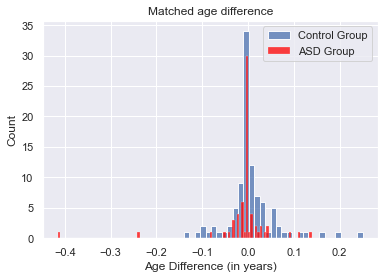

In [123]:
sns.histplot(selected_female_age_control - selected_male_age_control)
sns.histplot(selected_female_age_asd - selected_male_age_asd, color='red')

plt.xlabel('Age Difference (in years)')
plt.title('Matched age difference')
plt.legend(labels=['Control Group', 'ASD Group'])

plt.show()

As hoped for, both the control and the ASD group are matched very well, with the largest age difference being 0,4 years of age. We can see by the distribution that most females were matched perfectly with a male participant.

#### *1.5. Demographic information of matched sample*

It would now be valuable to assess what kind of participants we have in our matched sample. 

In [27]:
joined_list = []
for list1 in (matched_list_asd):
     joined_list.extend(list1)
for list1 in (matched_list_control):
     joined_list.extend(list1)
        
len(joined_list)

328

For this we created a joined list of the matched ASD and control lists.

In [28]:
joined_list

[50005,
 50243,
 50023,
 50148,
 50029,
 50823,
 50057,
 50191,
 50119,
 50686,
 50125,
 50652,
 50127,
 50411,
 50185,
 51236,
 50276,
 50273,
 50278,
 50805,
 50284,
 50286,
 50285,
 50298,
 50300,
 50310,
 50302,
 51214,
 50309,
 50982,
 50319,
 50120,
 50321,
 50124,
 50407,
 50405,
 50604,
 50155,
 50615,
 51175,
 50619,
 50517,
 50620,
 50618,
 50621,
 50608,
 50623,
 51239,
 50624,
 50626,
 50627,
 50978,
 50644,
 50711,
 50648,
 51320,
 50650,
 51582,
 50743,
 50323,
 50744,
 50613,
 50749,
 50235,
 50792,
 50802,
 50795,
 51348,
 50796,
 50122,
 50798,
 50791,
 50952,
 51011,
 50953,
 50800,
 50954,
 50522,
 50955,
 50294,
 50956,
 51300,
 50957,
 51220,
 50958,
 50144,
 50959,
 51459,
 50960,
 50651,
 50961,
 50499,
 50962,
 50003,
 51162,
 50609,
 51164,
 50793,
 51167,
 51165,
 51170,
 50993,
 51207,
 50183,
 51215,
 51202,
 51219,
 50972,
 51226,
 50965,
 51228,
 51166,
 51230,
 51472,
 51242,
 50510,
 51321,
 51330,
 51325,
 50708,
 51460,
 50497,
 51462,
 51465,
 51463,


In [29]:
selected_df = Data_overview.loc[Data_overview['subject'].isin(joined_list)]

In [30]:
selected_df

Unnamed: 0  Unnamed: 0.1  SUB_ID     X  subject  SITE_ID  \
1              1             2   50003     2    50003     PITT   
3              3             4   50005     4    50005     PITT   
19            19            20   50023    20    50023     PITT   
25            25            26   50029    26    50029     PITT   
32            32            33   50036    33    50036     PITT   
...          ...           ...     ...   ...      ...      ...   
1079        1079          1080   51493  1080    51493  CALTECH   
1080        1080          1081   51556  1081    51556      SBL   
1083        1083          1084   51559  1084    51559      SBL   
1106        1106          1107   51582  1107    51582      SBL   
1110        1110          1111   51606  1111    51606  MAX_MUN   

               FILE_ID  DX_GROUP  DSM_IV_TR  AGE_AT_SCAN  ...  \
1         Pitt_0050003         1          1        24.45  ...   
3         Pitt_0050005         1          1        13.73  ...   
19        Pitt_0050023         1          1        12.64  ...   
25        Pitt_0050029         1          1        11.40  ...   
32        Pitt_0050036         2          0        13.28  ...   
...                ...       ...        ...          ...  ...   
1079   Caltech_0051493         2          0        29.20  ...   
1080       SBL_0051556         2          0        20.00  ...   
1083       SBL_0051559         2          0        27.00  ...   
1106       SBL_0051582         1          2        31.00  ...   
1110  MaxMun_a_0051606         1          2        29.00  ...   

      qc_notes_rater_1 qc_anat_rater_2  qc_anat_notes_rater_2  \
1                  NaN              OK                    NaN   
3                  NaN              OK                    NaN   
19                 NaN              OK                    NaN   
25                 NaN           maybe    skull-striping fail   
32                 NaN              OK                    NaN   
...                ...             ...                    ...   
1079               NaN              OK                    NaN   
1080               NaN              OK                    NaN   
1083               NaN              OK                    NaN   
1106               NaN              OK                    NaN   
1110               NaN              OK                    NaN   

      qc_func_rater_2        qc_func_notes_rater_2  qc_anat_rater_3  \
1                  OK                          NaN               OK   
3               maybe       ic-parietal-cerebellum               OK   
19              maybe  ic-cerebellum_temporal_lobe               OK   
25               fail       ic-parietal-cerebellum               OK   
32              maybe                ic-cerebellum               OK   
...               ...                          ...              ...   
1079            maybe            Ic-parietal-minor               OK   
1080            maybe  ic-cerebellum-temporal_lobe               OK   
1083            maybe                ic-cerebellum               OK   
1106            maybe                ic-cerebellum               OK   
1110            maybe                ic-cerebellum               OK   

     qc_anat_notes_rater_3 qc_func_rater_3 qc_func_notes_rater_3  SUB_IN_SMP  
1                      NaN              OK                   NaN           1  
3                      NaN              OK                   NaN           0  
19                     NaN              OK                   NaN           0  
25                     NaN              OK                   NaN           0  
32                     NaN              OK                   NaN           0  
...                    ...             ...                   ...         ...  
1079                   NaN              OK                   NaN           0  
1080                   NaN              OK                   NaN           0  
1083                   NaN              OK                   NaN           0  
1106    

In [31]:
selected_df.describe()

Unnamed: 0  Unnamed: 0.1        SUB_ID            X       subject  \
count   328.000000    328.000000    328.000000   328.000000    328.000000   
mean    570.121951    571.121951  50772.881098   571.121951  50772.881098   
std     303.453280    303.453280    423.357493   303.453280    423.357493   
min       1.000000      2.000000  50003.000000     2.000000  50003.000000   
25%     300.250000    301.250000  50377.250000   301.250000  50377.250000   
50%     602.000000    603.000000  50786.000000   603.000000  50786.000000   
75%     812.750000    813.750000  51129.750000   813.750000  51129.750000   
max    1110.000000   1111.000000  51606.000000  1111.000000  51606.000000   

         DX_GROUP    DSM_IV_TR  AGE_AT_SCAN         SEX  HANDEDNESS_SCORES  \
count  328.000000   328.000000   328.000000  328.000000         105.000000   
mean     1.603659  -731.140244    15.695323    1.500000        -132.856667   
std      0.489884  2608.022581     7.064849    0.500764        1382.180332   
min      1.000000 -9999.000000     7.660000    1.000000       -9999.000000   
25%      1.000000     0.000000    11.200000    1.000000          48.000000   
50%      2.000000     0.000000    13.865000    1.500000          71.000000   
75%      2.000000     1.000000    17.425000    2.000000          89.000000   
max      2.000000     4.000000    46.000000    2.000000         100.000000   

       ...   func_fber   func_fwhm  func_dvars  func_outlier  func_quality  \
count  ...  325.000000  325.000000  325.000000    325.000000    325.000000   
mean   ...  106.021761    2.165669    1.090013      0.006249      0.012045   
std    ...   46.466386    0.366371    0.116777      0.006495      0.011785   
min    ...   33.836513    1.621089    0.709671      0.000197      0.001693   
25%    ...   72.096534    1.868385    1.011522      0.001310      0.006000   
50%    ...   92.036699    2.057008    1.074603      0.005388      0.009267   
75%    ...  133.575097    2.427396    1.162153      0.008089      0.014513   
max    ...  264.504674    3.489361    1.508322      0.035617      0.098614   

       func_mean_fd  func_num_fd  func_perc_fd    func_gsr  SUB_IN_SMP  
count    325.000000   325.000000    325.000000  325.000000  328.000000  
mean       0.122540    25.021538     11.794128    0.026347    0.420732  
std        0.157514    43.286187     17.611243    0.021531    0.494431  
min        0.016117     0.000000      0.000000   -0.015812    0.000000  
25%        0.045449     1.000000      0.552486    0.010559    0.000000  
50%        0.077653     7.000000      3.821656    0.029558    0.000000  
75%        0.130854    25.000000     14.925373    0.040873    1.000000  
max        1.324697   288.000000     91.735537    0.104225    1.000000  

[8 rows x 87 columns]

We are working with 328 participants, with an average age of 15.7. Thanks to our matching, we have an exactly even split of female to male participants. The group split is not exactly perfect, but there is not such a large difference that it would cause major issues later on. We will also keep this distinction in mind and can use algorithms to correct for this uneven split later on.

### 2. Practice Exploring the data

Now that we have matched our sample and gathered the relevant demographic information, it's finally time to download the imaging data. When downloading data, it is always important to check what we are working with and whether the things we wish to do with it are also applicable.

#### *2.1. Practice Download*

Before downloading all the files, we begin by loading just one participant.

In [56]:
import urllib.request

print('Beginning file download with urllib2...')

url = "https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ants/anat_thickness/Pitt_0050003_anat_thickness.nii.gz" 
urllib.request.urlretrieve(url, '/Users/gretivan/Desktop/Pitt_0050003_anat_thickness.nii.gz')

Beginning file download with urllib2...


('/Users/gretivan/Desktop/Pitt_0050003_anat_thickness.nii.gz',
 <http.client.HTTPMessage at 0x7f7cbb9d72b0>)

Using nibabel, we had a look at what the data actually looks like and the shape of it.

In [57]:
import nibabel as nb

Pitt_0050003 = nb.load('/Users/gretivan/Desktop/Pitt_0050003_anat_thickness.nii.gz')

In [58]:
data = Pitt_0050003.get_data()
data.shape

/Users/gretivan/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


(216, 256, 291)

This shows us that the images we are working with have 3 Dimensions to them.

#### *2.2. Visualizing*

It would be interesting to actually look at and get a detailed idea of the images. To do this we use nilearn as a tool to get a better and more interactive look at the gray matter images. When working with gray matter images, we are only looking at the cortical thickness of the start of the cortex to the beginning of the white matter. 


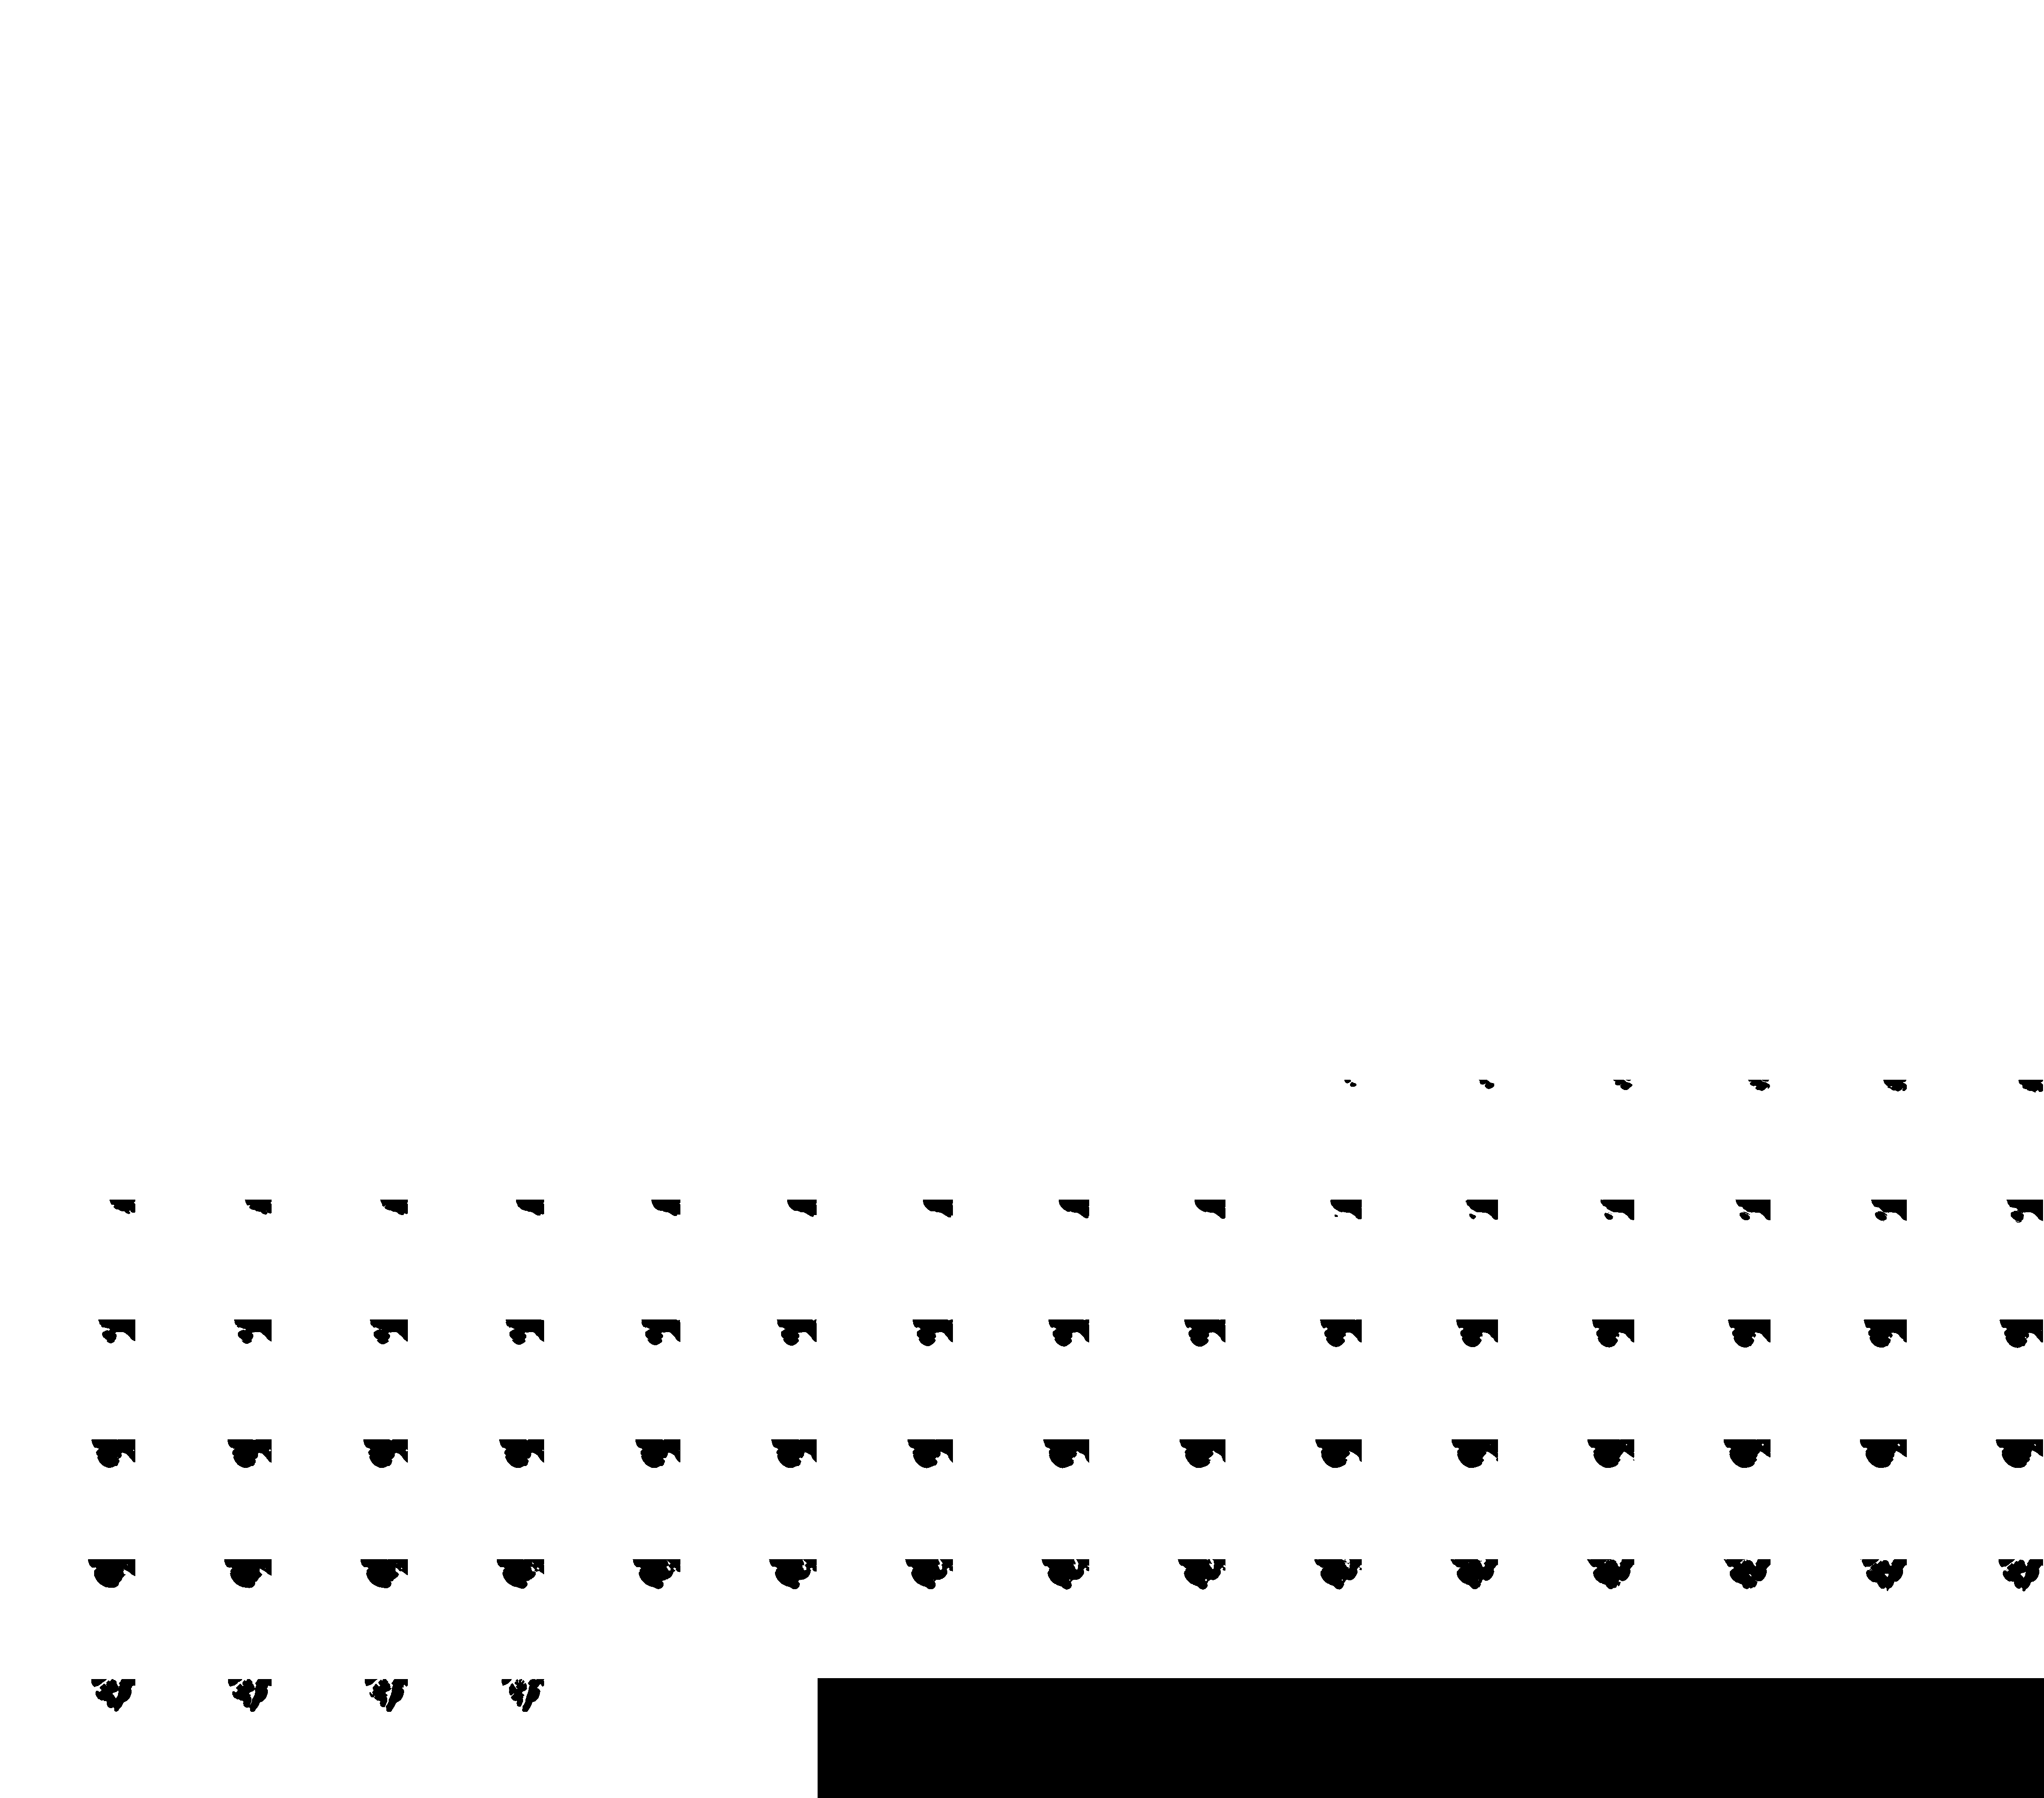
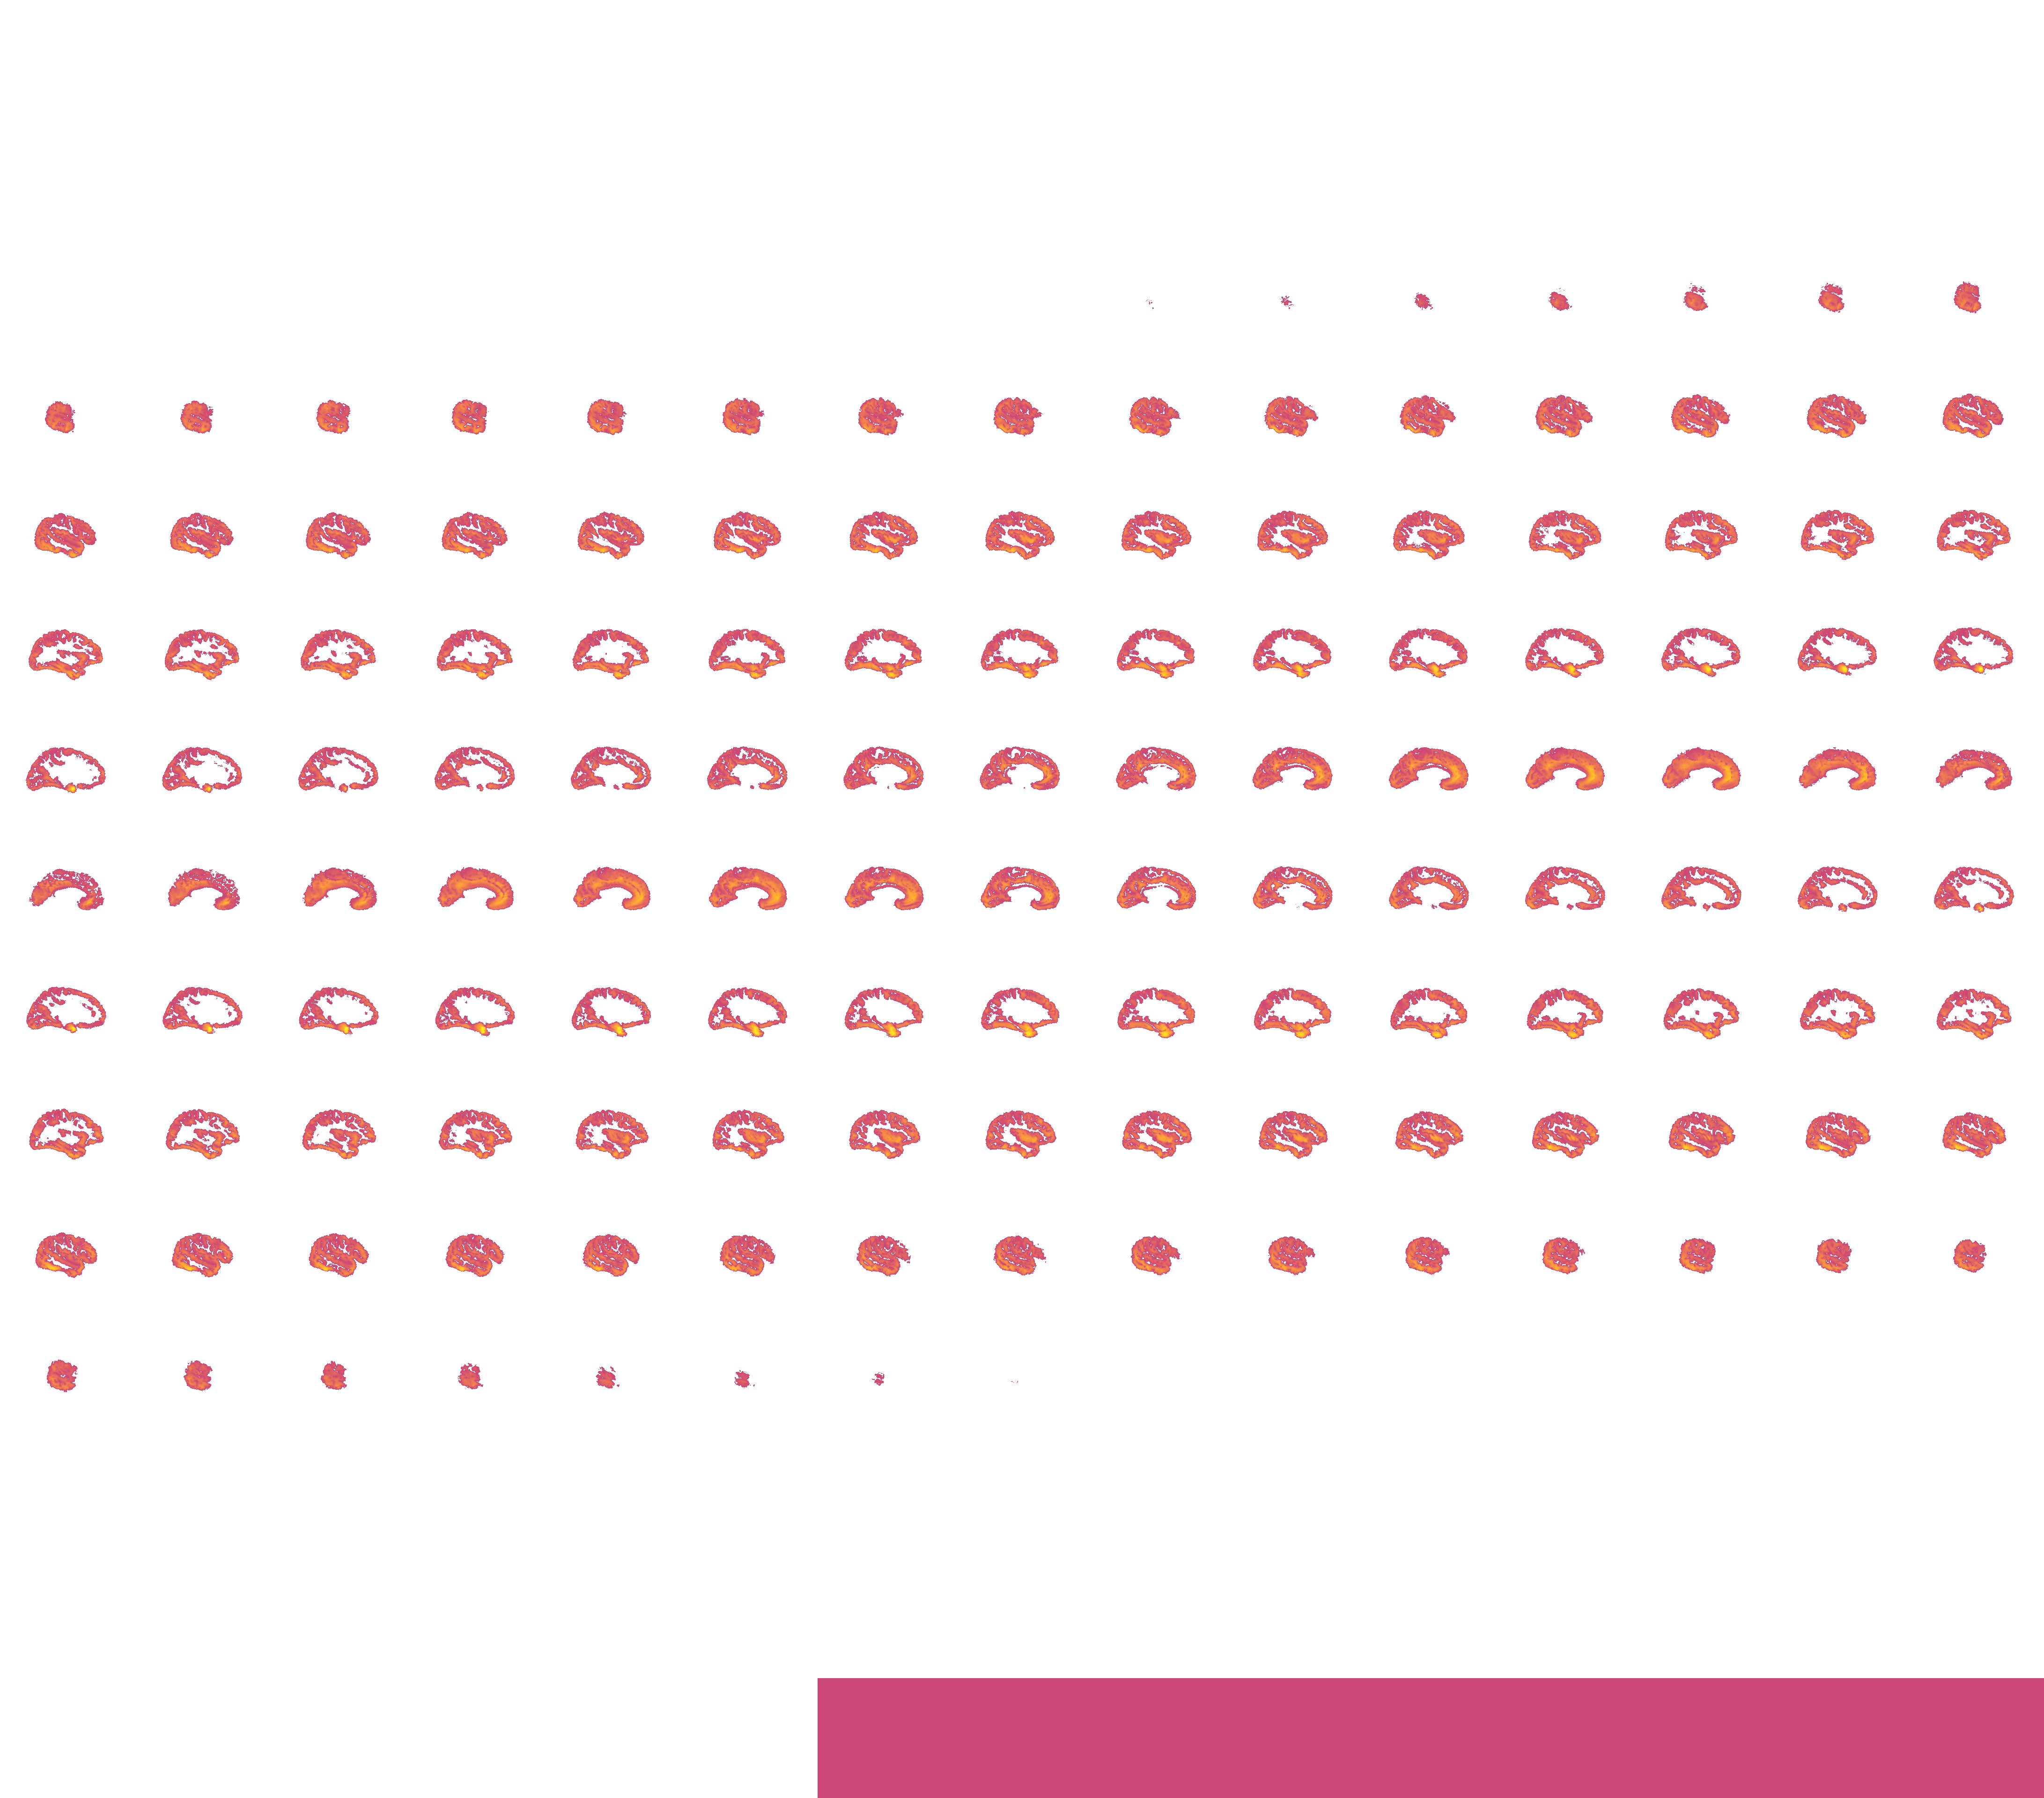

In [59]:
from nilearn.plotting import plot_anat, view_img
view_img(Pitt_0050003, bg_img = False, cmap = "plasma")

The different colors on this image, different shades of pink and orange, represent thicker or thinner areas of the gray matter. Overall, this image gives a good representation of the data we would like to work with.

#### *2.3. Deciding on and loading the Atlas*

In order to provide a more clear view of the coritcal thickness data, we decided to implement an atlas that partialises our images into 148 different areas and calculates the mean cortical thickness of this area. This allows for easier comparison between the different groups to establish whether differences exist.

To do this, we decided to use the [Destrieux atlas (2010)](https://surfer.nmr.mgh.harvard.edu/fswiki/CorticalParcellation) for this partialisation. We used the Destrieux atlas as it provides a more fine grained partialisation of brain areas compared to other atlases, such as the Desikan-Killiany atlas, that are widely used for Autism research. A very significant, and pivotal study in our decision making was carried out by [Haar et al., 2016](https://academic.oup.com/cercor/article/26/4/1440/2366467) who also applied the Destrieux atlas to the ABIDE I dataset to assess anatomical abnormalities in ASD. They reported finding several significantly larger cortical thicknesses in some areas in ASD groups when compared to controls. 

Now that we have picked which Atlas we wish to use to map and mask our data for easier analysis, we must download it. First of all, its important to have all the packages we wish to use in this proces downloaded.

In [36]:
from nilearn.image import load_img
from nilearn.maskers import NiftiLabelsMasker
from nilearn.datasets import fetch_atlas_destrieux_2009
from nilearn.plotting import plot_roi, plot_stat_map
from numpy import recarray

We can now fetch our Atlas.

In [37]:
destrieux_dataset = fetch_atlas_destrieux_2009(lateralized=True)

/Users/gretivan/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/nilearn/datasets/atlas.py:284: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


In [38]:
destrieux_atlas = load_img(destrieux_dataset.maps)

In [39]:
destrieux_atlas.shape

(76, 93, 76)

The shape of the atlas is also in 3 dimensional form which is important for our data, since it is also provided in 3 dimensions. 

/Users/gretivan/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/nilearn/plotting/img_plotting.py:348: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


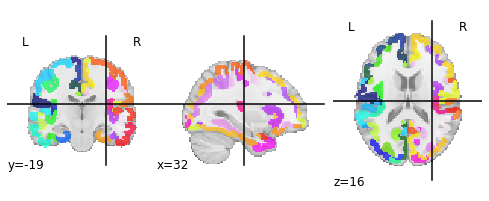

In [40]:
plot_roi(destrieux_atlas)

In [41]:
np.unique(destrieux_atlas.dataobj)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150], dtype=int32)

As provided in the information about the atlas, we can see here that there are 148 partialisations of gray matter regions. The Atlas also provides us with labels for these regions.

In [124]:
lables = destrieux_dataset.labels
lables

rec.array([(  0, 'Background'), (  1, 'L G_and_S_frontomargin'),
           (  2, 'L G_and_S_occipital_inf'),
           (  3, 'L G_and_S_paracentral'), (  4, 'L G_and_S_subcentral'),
           (  5, 'L G_and_S_transv_frontopol'),
           (  6, 'L G_and_S_cingul-Ant'),
           (  7, 'L G_and_S_cingul-Mid-Ant'),
           (  8, 'L G_and_S_cingul-Mid-Post'),
           (  9, 'L G_cingul-Post-dorsal'),
           ( 10, 'L G_cingul-Post-ventral'), ( 11, 'L G_cuneus'),
           ( 12, 'L G_front_inf-Opercular'),
           ( 13, 'L G_front_inf-Orbital'),
           ( 14, 'L G_front_inf-Triangul'), ( 15, 'L G_front_middle'),
           ( 16, 'L G_front_sup'), ( 17, 'L G_Ins_lg_and_S_cent_ins'),
           ( 18, 'L G_insular_short'), ( 19, 'L G_occipital_middle'),
           ( 20, 'L G_occipital_sup'), ( 21, 'L G_oc-temp_lat-fusifor'),
           ( 22, 'L G_oc-temp_med-Lingual'),
           ( 23, 'L G_oc-temp_med-Parahip'), ( 24, 'L G_orbital'),
           ( 25, 'L G_pariet_inf-Angul

#### *2.4. Checking the atlas space*

It's important to check whether the data and the Atlas are present in the same space. If they are not, we can not use a masker as there are no brain images that the masker can be mapped onto.

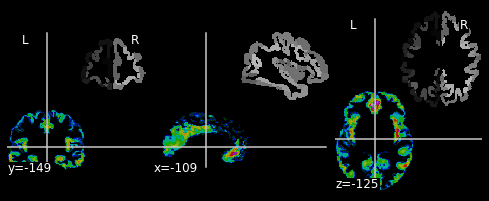

In [43]:
plot_roi(Pitt_0050003, bg_img=destrieux_atlas)

This image highlights the issue we mentioned above - the atlas and the test image are not in fact in the same space. This means that the atlas is not mapping onto the brain image. So we must move the image into the correct space.

#### *2.5. Adjusting the image*

In order to allign the atlas and the image, we must:
- get a different version of the thickness data
- get the transformations we need to transform the thickness data from the given participant's space to the template space, specifically MNI152NLin2009cAsym

It becomes very clear here why we explore a small set, or even just one image, of a dataset before downloading everything and working with that. 

We have to start by getting a different version of cortical thickness data than we had initially planned to download.

In [48]:
import urllib.request

In [61]:
url = "https://fcp-indi.s3.amazonaws.com/data/Projects/ABIDE/Outputs/mindboggle_swf/mindboggle/ants_subjects/sub-0050003/antsCorticalThickness.nii.gz" 
urllib.request.urlretrieve(url, '/Users/gretivan/Desktop/sub-0050003_desc-corticalthickness.nii.gz')

('/Users/gretivan/Desktop/sub-0050003_desc-corticalthickness.nii.gz',
 <http.client.HTTPMessage at 0x7f7cdc0fe6d8>)

Next we must get the transformations from the participant to the template space.

In [63]:
url = "https://fcp-indi.s3.amazonaws.com/data/Projects/ABIDE/Outputs/fmriprep/fmriprep/sub-0050003/anat/sub-0050003_from-T1w_to-MNI152NLin2009cAsym_mode-image_xfm.h5" 
urllib.request.urlretrieve(url, '/Users/gretivan/Desktop/sub-0050003_from-T1w_to-MNI152NLin2009cAsym_mode-image_xfm.h5')

('/Users/gretivan/Desktop/sub-0050003_from-T1w_to-MNI152NLin2009cAsym_mode-image_xfm.h5',
 <http.client.HTTPMessage at 0x7f7cdc0d1208>)

Next we must download the template image.

In [64]:
from templateflow import api as tflow

mni152 = tflow.get('MNI152NLin2009cAsym', desc=None, resolution=1,
                    suffix='T1w', extension='nii.gz')
mni152

PosixPath('/Users/gretivan/.cache/templateflow/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_T1w.nii.gz')

Now that we have downloaded a different version of the image and transformations, we can apply these transformations using ANTs (Advanced Normalisation Tool). During the downloading process and application of the antsApplyTransforms, we came across some issues. The Ants tool would not show up as an available command as bash would not access the bashrc file. In order to resolve this issue, we added an extra export path to bash with the path where the Ants file is located. 

In [65]:
import nipype
from nipype.interfaces.ants import ApplyTransforms

In [66]:
%%bash
export PATH=/Users/gretivan/Desktop/ants-2.4.3/bin:$PATH
echo $PATH

/Users/gretivan/Desktop/ants-2.4.3/bin:/Users/gretivan/miniconda3/envs/neuro_ai/bin:/Users/gretivan/miniconda3/condabin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/Apple/usr/bin


In [69]:
%%bash
/Users/gretivan/Desktop/ants-2.4.3/bin/antsApplyTransforms  -i /Users/gretivan/Desktop/sub-0050003_desc-corticalthickness.nii.gz -r /Users/gretivan/.cache/templateflow/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_T1w.nii.gz -t /Users/gretivan/Desktop/sub-0050003_from-T1w_to-MNI152NLin2009cAsym_mode-image_xfm.h5 -o /Users/gretivan/Desktop/sub-0050003_space-MNI152NLin2009cAsym_desc-corticalthickness.nii.gz

In [70]:
from nilearn.plotting import plot_img

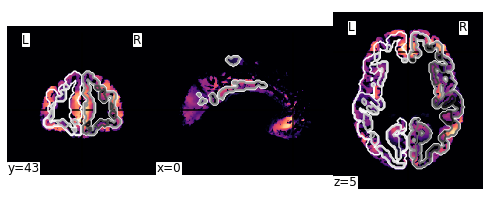

In [71]:
fig = plot_img('/Users/gretivan/Desktop/sub-0050003_space-MNI152NLin2009cAsym_desc-corticalthickness.nii.gz', cmap='magma')
fig.add_contours(destrieux_atlas, cmap='Greys')

Here we can see that the masker and the image are now in the same space, meaning we can now apply the masker.

#### *2.6. Testing the masker*

The destrieux atlas can be used as a masker for our data to allow for an assessment of 2 dimensional cortical thickness data as opposed to a 3 dimensional image. It will help us when looking at differences between groups.

In [55]:
destrieux_masker = NiftiLabelsMasker(labels_img=destrieux_atlas)
thickness_sub0050003 = destrieux_masker.fit_transform('/Users/gretivan/Desktop/sub-0050003_space-MNI152NLin2009cAsym_desc-corticalthickness.nii.gz')

In [56]:
thickness_sub0050003.shape

(1, 148)

Here we can see that our image is now in a 2 dimensional shape, with 148 mean cortical thickness volumes. 

In [57]:
thickness_sub0050003

array([[1.24944175, 2.34536168, 0.606836  , 1.71352572, 1.52545434,
        3.10993156, 2.04731399, 2.10898342, 2.92694597, 1.52362547,
        1.25300568, 1.78683702, 1.36531509, 1.33183801, 1.72617632,
        1.79656362, 2.45268168, 3.06566965, 1.91948329, 1.06945715,
        3.09177802, 1.51964456, 2.92252828, 1.61312081, 1.33889796,
        1.75681046, 0.82938553, 0.79790724, 1.27660216, 1.80350527,
        2.29007522, 0.92637947, 1.33526913, 1.97557859, 1.29265578,
        1.15743216, 2.56120038, 2.35720902, 1.17724812, 1.49941028,
        1.3729409 , 1.41701773, 2.84152904, 1.25315129, 0.46842935,
        1.03995316, 1.60925862, 0.85085033, 1.84187833, 2.91596348,
        2.02335056, 1.37771389, 0.84202682, 1.40546209, 0.86230999,
        0.8225973 , 0.99084249, 1.25135441, 2.01259242, 3.08581815,
        2.71363081, 0.60009495, 0.88043531, 1.34770937, 1.15595373,
        0.83335493, 0.80230146, 1.0742383 , 0.84154005, 3.80625478,
        2.01734593, 1.77281437, 1.52858828, 0.67

### *3. Exploring the full dataset*

Now that we have established what kind of data we are working with, what atlas we are wanting to use, and what kind of preprocessing is needed to make sure that the masker works, we can download the full matched sample.

#### *3.1. Downloading the matched dataset*

In [58]:
failed_download = []

for subject in joined_list:
    print(subject, end=", ")
    try:
        # Downloading different cortical thickness images
        url = "https://fcp-indi.s3.amazonaws.com/data/Projects/ABIDE/Outputs/mindboggle_swf/mindboggle/ants_subjects/sub-00%s/antsCorticalThickness.nii.gz" %(subject) 
        urllib.request.urlretrieve(url, '/Users/gretivan/Desktop/Neuro_data/sub-00%s_desc-corticalthickness.nii.gz'%(subject))
        # Downloading transformation template for thickness images 
        url = "https://fcp-indi.s3.amazonaws.com/data/Projects/ABIDE/Outputs/fmriprep/fmriprep/sub-00%s/anat/sub-00%s_from-T1w_to-MNI152NLin2009cAsym_mode-image_xfm.h5" %(subject, subject)
        urllib.request.urlretrieve(url, '/Users/gretivan/Desktop/Neuro_data/sub-00%s_from-T1w_to-MNI152NLin2009cAsym_mode-image_xfm.h5'%(subject))
    except urllib.error.HTTPError:
        failed_download.append(subject)
        
print(failed_download)



50005, 50243, 50023, 50148, 50029, 50823, 50057, 50191, 50119, 50686, 50125, 50652, 50127, 50411, 50185, 51236, 50276, 50273, 50278, 50805, 50284, 50286, 50285, 50298, 50300, 50310, 50302, 51214, 50309, 50982, 50319, 50120, 50321, 50124, 50407, 50405, 50604, 50155, 50615, 51175, 50619, 50517, 50620, 50618, 50621, 50608, 50623, 51239, 50624, 50626, 50627, 50978, 50644, 50711, 50648, 51320, 50650, 51582, 50743, 50323, 50744, 50613, 50749, 50235, 50792, 50802, 50795, 51348, 50796, 50122, 50798, 50791, 50952, 51011, 50953, 50800, 50954, 50522, 50955, 50294, 50956, 51300, 50957, 51220, 50958, 50144, 50959, 51459, 50960, 50651, 50961, 50499, 50962, 50003, 51162, 50609, 51164, 50793, 51167, 51165, 51170, 50993, 51207, 50183, 51215, 51202, 51219, 50972, 51226, 50965, 51228, 51166, 51230, 51472, 51242, 50510, 51321, 51330, 51325, 50708, 51460, 50497, 51462, 51465, 51463, 50477, 51471, 51019, 51606, 51322, 50036, 50417, 50038, 50568, 50049, 50427, 50059, 51156, 50113, 50116, 50114, 51556, 50201,

During the download we noticed some files were unable to be downloaded. These are shown in a failed_download list.

In [59]:
print(failed_download)

[50309, 50517, 50323, 50522, 50499, 51242, 50510, 50497, 50477, 50049, 50423, 50436, 50432, 50722, 50460, 50472, 50450]


In [72]:
failed_download = [50309, 50517, 50323, 50522, 50499, 51242, 50510, 50497, 50477, 50049, 50423, 50436, 50432, 50722, 50460, 50472, 50450]

<div class="alert alert-danger"> if download is not in/ isin continue, if not append ---> loop to get successful download, logcial opperator 

In [125]:
successful_download = [50005, 50243, 50023, 50148, 50029, 50823, 50057, 50191, 50119, 50686, 50125, 50652, 50127, 50411, 50185, 51236, 50276, 50273, 50278, 50805, 50284, 50286, 50285, 50298, 50300, 50310, 50302, 51214, 50982, 50319, 50120, 50321, 50124, 50407, 50405, 50604, 50155, 50615, 51175, 50619, 50620, 50618, 50621, 50608, 50623, 51239, 50624, 50626, 50627, 50978, 50644, 50711, 50648, 51320, 50650, 51582, 50743, 50744, 50613, 50749, 50235, 50792, 50802, 50795, 51348, 50796, 50122, 50798, 50791, 50952, 51011, 50953, 50800, 50954, 50955, 50294, 50956, 51300, 50957, 51220, 50958, 50144, 50959, 51459, 50960, 50651, 50961, 50962, 50003, 51162, 50609, 51164, 50793, 51167, 51165, 51170, 50993, 51207, 50183, 51215, 51202, 51219, 50972, 51226, 50965, 51228, 51166, 51230, 51472, 51321, 51330, 51325, 50708, 51460, 51462, 51465, 51463, 51471, 51019, 51606, 51322, 50036, 50417, 50038, 50568, 50427, 50059, 51156, 50113, 50116, 50114, 51556, 50201, 50043, 50205, 50206, 50554, 50208, 50213, 51199, 50215, 51128, 50336, 51269, 50338, 51097, 50340, 50330, 50341, 50344, 50343, 51276, 50348, 51112, 50353, 51314, 50354, 50575, 50356, 50331, 50357, 51280, 50361, 50369, 50422, 50373, 50391, 50374, 50165, 50375, 50378, 50379, 51100, 50380, 50328, 50414, 51135, 50555, 51101, 50557, 51075, 50558, 51099, 50563, 50727, 50565, 50571, 50569, 50570, 50572, 51140, 50576, 50809, 50656, 50698, 50661, 50109, 50669, 51343, 50200, 50723, 50360, 50730, 50578, 50735, 50050, 50736, 50426, 50778, 50816, 50780, 51085, 50783, 50359, 50784, 51080, 50788, 50159, 50790, 51081, 50810, 51281, 50812, 50817, 50820, 50164, 51036, 51069, 51038, 51183, 51039, 50814, 51040, 50777, 51041, 51082, 51042, 51083, 51044, 50773, 51045, 51262, 51046, 50158, 51047, 51094, 51048, 50822, 51049, 51137, 51050, 51096, 51051, 51266, 51052, 50573, 51053, 50383, 51054,  51055, 51265, 51056, 51077, 51057, 50262, 51058, 51059, 51115, 51060, 51150, 51061, 51559, 51062, 51481, 51063, 51118, 51180, 50564, 51184, 50161, 51188, 50162, 51192, 50333, 51264, 51272, 51267, 50362, 51279, 51260, 51282, 50552, 51303, 51359, 51305, 51136, 51366, 51369, 51368, 50041, 51370, 51363, 51372, 51373, 51479, 51146, 51480, 51483, 51482, 51493, 51339]

In [45]:
len(successful_download)

311

In [73]:
len(failed_download)

17

Even though we our dataset was again reduced by 17 datapoints, or brain images, as a result to them not being able to download, we decided to, instead of rematching the 17 that are now left unmatched, apply an algorithm later on that takes these group differences into account as previously mentioned.

#### *3.2. Rechecking the demographic information*

Since 17 files could not be downloaded, we are left with a smaller sample of 311 participants. Lets recheck the demographics. 

In [74]:
successful_demographics = Data_overview.loc[Data_overview['subject'].isin(successful_download)]

In [75]:
successful_demographics

Unnamed: 0  Unnamed: 0.1  SUB_ID     X  subject  SITE_ID  \
1              1             2   50003     2    50003     PITT   
3              3             4   50005     4    50005     PITT   
19            19            20   50023    20    50023     PITT   
25            25            26   50029    26    50029     PITT   
32            32            33   50036    33    50036     PITT   
...          ...           ...     ...   ...      ...      ...   
1079        1079          1080   51493  1080    51493  CALTECH   
1080        1080          1081   51556  1081    51556      SBL   
1083        1083          1084   51559  1084    51559      SBL   
1106        1106          1107   51582  1107    51582      SBL   
1110        1110          1111   51606  1111    51606  MAX_MUN   

               FILE_ID  DX_GROUP  DSM_IV_TR  AGE_AT_SCAN  ...  \
1         Pitt_0050003         1          1        24.45  ...   
3         Pitt_0050005         1          1        13.73  ...   
19        Pitt_0050023         1          1        12.64  ...   
25        Pitt_0050029         1          1        11.40  ...   
32        Pitt_0050036         2          0        13.28  ...   
...                ...       ...        ...          ...  ...   
1079   Caltech_0051493         2          0        29.20  ...   
1080       SBL_0051556         2          0        20.00  ...   
1083       SBL_0051559         2          0        27.00  ...   
1106       SBL_0051582         1          2        31.00  ...   
1110  MaxMun_a_0051606         1          2        29.00  ...   

      qc_notes_rater_1 qc_anat_rater_2  qc_anat_notes_rater_2  \
1                  NaN              OK                    NaN   
3                  NaN              OK                    NaN   
19                 NaN              OK                    NaN   
25                 NaN           maybe    skull-striping fail   
32                 NaN              OK                    NaN   
...                ...             ...                    ...   
1079               NaN              OK                    NaN   
1080               NaN              OK                    NaN   
1083               NaN              OK                    NaN   
1106               NaN              OK                    NaN   
1110               NaN              OK                    NaN   

      qc_func_rater_2        qc_func_notes_rater_2  qc_anat_rater_3  \
1                  OK                          NaN               OK   
3               maybe       ic-parietal-cerebellum               OK   
19              maybe  ic-cerebellum_temporal_lobe               OK   
25               fail       ic-parietal-cerebellum               OK   
32              maybe                ic-cerebellum               OK   
...               ...                          ...              ...   
1079            maybe            Ic-parietal-minor               OK   
1080            maybe  ic-cerebellum-temporal_lobe               OK   
1083            maybe                ic-cerebellum               OK   
1106            maybe                ic-cerebellum               OK   
1110            maybe                ic-cerebellum               OK   

     qc_anat_notes_rater_3 qc_func_rater_3 qc_func_notes_rater_3  SUB_IN_SMP  
1                      NaN              OK                   NaN           1  
3                      NaN              OK                   NaN           0  
19                     NaN              OK                   NaN           0  
25                     NaN              OK                   NaN           0  
32                     NaN              OK                   NaN           0  
...                    ...             ...                   ...         ...  
1079                   NaN              OK                   NaN           0  
1080                   NaN              OK                   NaN           0  
1083                   NaN              OK                   NaN           0  
1106    

In [76]:
successful_demographics.describe()

Unnamed: 0  Unnamed: 0.1        SUB_ID            X       subject  \
count   311.000000    311.000000    311.000000   311.000000    311.000000   
mean    580.099678    581.099678  50788.311897   581.099678  50788.311897   
std     306.012396    306.012396    426.120741   306.012396    426.120741   
min       1.000000      2.000000  50003.000000     2.000000  50003.000000   
25%     297.500000    298.500000  50374.500000   298.500000  50374.500000   
50%     614.000000    615.000000  50798.000000   615.000000  50798.000000   
75%     821.500000    822.500000  51138.500000   822.500000  51138.500000   
max    1110.000000   1111.000000  51606.000000  1111.000000  51606.000000   

         DX_GROUP    DSM_IV_TR  AGE_AT_SCAN         SEX  HANDEDNESS_SCORES  \
count  311.000000   311.000000   311.000000  311.000000          94.000000   
mean     1.610932  -771.135048    15.599116    1.514469        -155.904255   
std      0.488324  2672.792656     7.120146    0.500596        1459.767555   
min      1.000000 -9999.000000     7.660000    1.000000       -9999.000000   
25%      1.000000     0.000000    11.080000    1.000000          44.500000   
50%      2.000000     0.000000    13.780000    2.000000          69.000000   
75%      2.000000     1.000000    17.355000    2.000000          89.000000   
max      2.000000     4.000000    46.000000    2.000000         100.000000   

       ...   func_fber   func_fwhm  func_dvars  func_outlier  func_quality  \
count  ...  309.000000  309.000000  309.000000    309.000000    309.000000   
mean   ...  107.505379    2.174188    1.090451      0.006264      0.011391   
std    ...   46.756526    0.367685    0.119160      0.006303      0.010334   
min    ...   33.836513    1.621089    0.709671      0.000197      0.001693   
25%    ...   72.303412    1.872158    1.008803      0.001406      0.005826   
50%    ...   94.165911    2.080066    1.076446      0.005738      0.009097   
75%    ...  134.382319    2.432877    1.165317      0.008300      0.014300   
max    ...  264.504674    3.489361    1.508322      0.035617      0.098614   

       func_mean_fd  func_num_fd  func_perc_fd    func_gsr  SUB_IN_SMP  
count    309.000000   309.000000    309.000000  309.000000  311.000000  
mean       0.116046    23.035599     11.142548    0.025744    0.408360  
std        0.140554    39.766551     16.604553    0.021717    0.492323  
min        0.016117     0.000000      0.000000   -0.015812    0.000000  
25%        0.045322     1.000000      0.552486    0.010012    0.000000  
50%        0.073796     7.000000      3.654485    0.028792    0.000000  
75%        0.128553    24.000000     14.012739    0.040802    1.000000  
max        1.224343   288.000000     91.735537    0.104225    1.000000  

[8 rows x 87 columns]

We can see here that we still have a relatively even group splits, with a slightly higher average age. 

#### *3.3. Apply the transformations*

The next thing to do, now that we have a list of successfully downloaded participant IDs, is to apply the transformation to all of them to create a 3rd transformed file. To do this, we use a loop with the syntax from above where we initially applied the transformation to one participant. 

In [69]:
successful_list_str = ' '.join([str(subject) for subject in successful_download])

In [70]:
%%bash -s "$successful_list_str"

for subject in $1
do
echo $subject
antsApplyTransforms -i /Users/gretivan/Desktop/Neuro_data/sub-00${subject}_desc-corticalthickness.nii.gz -r /Users/gretivan/.cache/templateflow/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_T1w.nii.gz -t /Users/gretivan/Desktop/Neuro_data/sub-00${subject}_from-T1w_to-MNI152NLin2009cAsym_mode-image_xfm.h5 -o /Users/gretivan/Desktop/Neuro_data/sub-00${subject}_space-MNI152NLin2009cAsym_desc-corticalthickness.nii.gz
done

50005
50243
50023
50148
50029
50823
50057
50191
50119
50686
50125
50652
50127
50411
50185
51236
50276
50273
50278
50805
50284
50286
50285
50298
50300
50310
50302
51214
50982
50319
50120
50321
50124
50407
50405
50604
50155
50615
51175
50619
50620
50618
50621
50608
50623
51239
50624
50626
50627
50978
50644
50711
50648
51320
50650
51582
50743
50744
50613
50749
50235
50792
50802
50795
51348
50796
50122
50798
50791
50952
51011
50953
50800
50954
50955
50294
50956
51300
50957
51220
50958
50144
50959
51459
50960
50651
50961
50962
50003
51162
50609
51164
50793
51167
51165
51170
50993
51207
50183
51215
51202
51219
50972
51226
50965
51228
51166
51230
51472
51321
51330
51325
50708
51460
51462
51465
51463
51471
51019
51606
51322
50036
50417
50038
50568
50427
50059
51156
50113
50116
50114
51556
50201
50043
50205
50206
50554
50208
50213
51199
50215
51128
50336
51269
50338
51097
50340
50330
50341
50344
50343
51276
50348
51112
50353
51314
50354
50575
50356
50331
50357
51280
50361
50369
50422
50373
5039

After downloading the data, and transforming it to the correct space, we need to apply the masker and save it in a dictionary.

In [78]:
output = {}
for subject in successful_download:
    print(subject, end=',')
    
        # Apply the masker to each subject
    destrieux_masker = NiftiLabelsMasker(labels_img=destrieux_atlas)
    temp = destrieux_masker.fit_transform('/Users/gretivan/Desktop/Neuro_data/sub-00%s_space-MNI152NLin2009cAsym_desc-corticalthickness.nii.gz'%(subject))
    output[subject] = temp
    np.save('/Users/gretivan/Desktop/Neuro_data/sub-00%s_destrieux-corticalthickness.npy'%(subject), temp)
        

50005,50243,50023,50148,50029,50823,50057,50191,50119,50686,50125,50652,50127,50411,50185,51236,50276,50273,50278,50805,50284,50286,50285,50298,50300,50310,50302,51214,50982,50319,50120,50321,50124,50407,50405,50604,50155,50615,51175,50619,50620,50618,50621,50608,50623,51239,50624,50626,50627,50978,50644,50711,50648,51320,50650,51582,50743,50744,50613,50749,50235,50792,50802,50795,51348,50796,50122,50798,50791,50952,51011,50953,50800,50954,50955,50294,50956,51300,50957,51220,50958,50144,50959,51459,50960,50651,50961,50962,50003,51162,50609,51164,50793,51167,51165,51170,50993,51207,50183,51215,51202,51219,50972,51226,50965,51228,51166,51230,51472,51321,51330,51325,50708,51460,51462,51465,51463,51471,51019,51606,51322,50036,50417,50038,50568,50427,50059,51156,50113,50116,50114,51556,50201,50043,50205,50206,50554,50208,50213,51199,50215,51128,50336,51269,50338,51097,50340,50330,50341,50344,50343,51276,50348,51112,50353,51314,50354,50575,50356,50331,50357,51280,50361,50369,50422,50373,5039

In [73]:
print(output)

{50005: array([[1.88431166, 1.76320336, 1.11390663, 1.48948011, 1.57417584,
        2.97995139, 2.38282191, 2.2512736 , 3.48374256, 1.81977405,
        0.75322368, 1.95353456, 2.23619082, 1.48573905, 1.86495464,
        2.11882744, 2.40894353, 3.53348546, 1.8843735 , 0.93950251,
        2.15076486, 1.46824549, 2.35921589, 2.09702396, 1.6438221 ,
        1.73707352, 1.101166  , 0.93737361, 1.41206387, 2.19841133,
        2.00448107, 0.91124679, 1.14893239, 2.66672103, 1.22886184,
        1.47507838, 2.32726174, 2.73099436, 1.6916697 , 1.66477398,
        1.27619732, 0.89819511, 2.73064589, 1.34446161, 0.40929411,
        1.20095507, 1.83660777, 0.8791849 , 1.77808816, 3.15361791,
        2.12237219, 1.37161697, 1.17744452, 1.27603078, 0.82204156,
        1.10068347, 1.00103868, 0.80338873, 2.3565658 , 2.75643984,
        2.54019814, 0.72897244, 0.82760495, 1.62765494, 1.3111408 ,
        1.2412859 , 0.84518014, 1.00472426, 1.28115383, 3.01723173,
        2.1098516 , 1.59073786, 1.474894

### 4. Data Analysis

#### *4.1. Correlation*

Now that we have preprocessed our data (downloaded, transformed and masked), we can start with the data analysis. The first area of interest is to visualize the correlations between our average cortical thicknesses. 

To do this, we have to first reshape our dictioary as it is currently in 3 Dimensions which is not accepted by the dataframe from dict function.

In [96]:
copied_output = output.copy()

In [98]:
for key, value in copied_output.items():
    copied_output[key] = np.array(value).flatten().tolist()
print(copied_output)

{50005: [1.8843116580679127, 1.7632033588890814, 1.11390663255268, 1.4894801092224226, 1.574175841995615, 2.9799513923711474, 2.382821913369561, 2.2512735977345826, 3.4837425619036035, 1.8197740537508602, 0.7532236795371391, 1.9535345605040175, 2.2361908239181294, 1.485739048249093, 1.8649546351436141, 2.118827436960781, 2.4089435277446603, 3.5334854557176376, 1.8843734971781836, 0.9395025142424569, 2.150764860386891, 1.4682454869911885, 2.3592158852990788, 2.0970239572027447, 1.6438221042611592, 1.737073522745288, 1.1011660034546134, 0.9373736117930688, 1.4120638667356598, 2.1984113274997346, 2.004481070574635, 0.9112467934564467, 1.148932387732501, 2.6667210341107745, 1.2288618361351162, 1.4750783777781058, 2.3272617361609744, 2.7309943604106635, 1.6916697011564357, 1.6647739767688061, 1.2761973197284189, 0.8981951145167861, 2.7306458871438313, 1.3444616084749008, 0.4092941108964016, 1.2009550717519109, 1.8366077674266679, 0.8791849047463367, 1.7780881584983663, 3.153617907381963, 2.

In [101]:
output_df = pd.DataFrame.from_dict(copied_output)
output_df

50005     50243     50023     50148     50029     50823     50057  \
0    1.884312  1.808494  1.639492  1.175045  1.926571  1.341950  1.611954   
1    1.763203  2.758280  2.286924  2.282386  2.848637  2.395108  2.129435   
2    1.113907  1.378670  1.098771  1.479585  1.265451  1.318799  1.567942   
3    1.489480  2.164748  1.940247  2.316161  2.432516  2.397342  1.904859   
4    1.574176  2.009253  1.220210  1.190495  2.827137  1.364059  2.328978   
..        ...       ...       ...       ...       ...       ...       ...   
143  2.634995  2.692000  2.506023  2.163953  2.934882  2.226297  1.893980   
144  2.486487  3.459162  3.217465  2.471602  3.365702  3.436234  2.497402   
145  1.813947  2.029375  1.877515  1.459971  2.055749  2.392670  1.889100   
146  1.377991  1.806214  1.985037  1.644803  1.884782  1.806623  1.723144   
147  0.450372  0.560012  0.373442  0.404269  0.749440  0.814612  0.764688   

        50191     50119     50686  ...     51363     51372     51373  \
0    1.178617  0.895068  1.137727  ...  1.020349  1.014068  1.024022   
1    2.740201  2.058616  2.620140  ...  1.456329  1.849086  2.252372   
2    0.846326  1.257798  1.100486  ...  0.545434  0.805782  0.533919   
3    1.703106  2.015547  1.604921  ...  1.183528  1.623594  1.272603   
4    1.214955  1.188583  1.166113  ...  0.734854  1.293781  0.946754   
..        ...       ...       ...  ...       ...       ...       ...   
143  2.551567  2.020542  2.408232  ...  1.913473  2.066965  1.673923   
144  3.629664  2.931455  2.951812  ...  2.244897  2.808212  2.490250   
145  2.573372  2.007722  1.695569  ...  1.343610  1.861284  1.524503   
146  1.787945  1.731221  1.768279  ...  1.238045  1.627495  1.404834   
147  0.534441  0.695938  0.637771  ...  0.245704  0.585838  0.285328   

        51479     51146     51480     51483     51482     51493     51339  
0    1.063714  1.330252  1.997742  1.266157  1.270886  1.229675  0.997755  
1    1.199759  2.137025  2.194494  1.616737  1.681414  1.880099  1.723037  
2    0.348924  0.854489  0.875476  0.429743  0.359538  0.349756  0.701737  
3    1.223189  2.138176  2.139823  2.086772  1.628488  1.643691  1.436447  
4    0.963564  1.258846  1.769235  1.293948  1.316159  1.423040  1.142354  
..        ...       ...       ...       ...       ...       ...       ...  
143  2.653675  1.899904  2.225462  2.665970  2.618515  1.559863  1.626178  
144  2.494002  2.575238  2.850502  2.761292  2.797827  3.514799  2.739708  
145  2.089433  1.695396  1.525701  1.510985  1.458548  1.409663  1.300413  
146  1.365170  1.657661  1.613756  1.240207  1.653044  1.644841  1.397161  
147  0.352315  0.402193  0.486928  0.337399  0.465601  0.794957  0.319924  

[148 rows x 311 columns]

We can see here that the new dataframe we have created has the participant IDs in the columns and the items in the rows. We need to change this to create the correlation heat map. To do this we will transpose the dataframe.

In [113]:
transposed_output = output_df.T

In [117]:
transposed_df = pd.DataFrame(transposed_output)
transposed_df

0         1         2         3         4         5         6    \
50005  1.884312  1.763203  1.113907  1.489480  1.574176  2.979951  2.382822   
50243  1.808494  2.758280  1.378670  2.164748  2.009253  3.399129  2.550344   
50023  1.639492  2.286924  1.098771  1.940247  1.220210  3.271414  2.556528   
50148  1.175045  2.282386  1.479585  2.316161  1.190495  2.450898  1.855783   
50029  1.926571  2.848637  1.265451  2.432516  2.827137  3.119827  2.673950   
...         ...       ...       ...       ...       ...       ...       ...   
51480  1.997742  2.194494  0.875476  2.139823  1.769235  2.945434  2.816536   
51483  1.266157  1.616737  0.429743  2.086772  1.293948  3.121307  2.470730   
51482  1.270886  1.681414  0.359538  1.628488  1.316159  3.544188  2.184196   
51493  1.229675  1.880099  0.349756  1.643691  1.423040  3.663200  2.896599   
51339  0.997755  1.723037  0.701737  1.436447  1.142354  2.829672  2.227765   

            7         8         9    ...       138       139       140  \
50005  2.251274  3.483743  1.819774  ...  1.268674  1.332451  1.092183   
50243  2.685849  3.455819  2.275358  ...  1.601060  1.471437  1.004129   
50023  2.346739  3.034480  1.573858  ...  1.914193  0.946705  1.225646   
50148  2.015055  3.044080  2.108677  ...  1.920194  1.212740  1.049676   
50029  2.967056  3.506666  2.363364  ...  1.887636  1.113874  1.804394   
...         ...       ...       ...  ...       ...       ...       ...   
51480  2.009279  2.951361  1.508404  ...  1.781824  1.270997  1.221007   
51483  1.940298  3.198552  1.873882  ...  1.268609  0.999915  0.918082   
51482  2.038821  2.607549  1.187186  ...  1.557960  1.161430  0.806849   
51493  2.534234  3.229748  1.899079  ...  1.497577  1.113396  0.872430   
51339  1.707351  2.782328  1.599107  ...  0.949336  0.884236  0.813673   

            141       142       143       144       145       146       147  
50005  1.129284  1.001832  2.634995  2.486487  1.813947  1.377991  0.450372  
50243  1.408076  1.310058  2.692000  3.459162  2.029375  1.806214  0.560012  
50023  1.313261  0.903228  2.506023  3.217465  1.877515  1.985037  0.373442  
50148  1.063514  1.120005  2.163953  2.471602  1.459971  1.644803  0.404269  
50029  1.438875  1.418120  2.934882  3.365702  2.055749  1.884782  0.749440  
...         ...       ...       ...       ...       ...       ...       ...  
51480  1.174207  1.034510  2.225462  2.850502  1.525701  1.613756  0.486928  
51483  1.451173  0.875697  2.665970  2.761292  1.510985  1.240207  0.337399  
51482  1.125141  0.908633  2.618515  2.797827  1.458548  1.653044  0.465601  
51493  1.174021  0.835478  1.559863  3.514799  1.409663  1.644841  0.794957  
51339  0.859555  0.534621  1.626178  2.739708  1.300413  1.397161  0.319924  

[311 rows x 148 columns]

<AxesSubplot:>

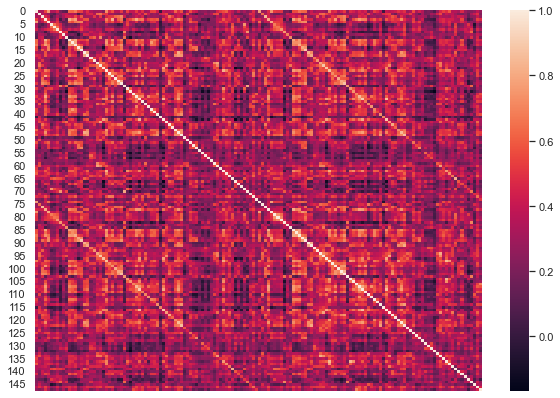

In [176]:
plt.figure(figsize=(10,7))
sns.heatmap(transposed_df.corr(), xticklabels=False, cmap='rocket')

Here we have our correlation heat map of the 148 different average cortical thickness scores. We can see that the correlations are relatively high between the different brain areas.

#### *4.2. Logistic Regression*

Now that we have gotten a good look at what the relationship between our data points looks like, we can carry out a logistic regression. The logistic regression aims to solve classification problems, by prediction categories in our data points as opposed to prediction one continuous outcome. Since we already know the categories we are working with, which is presented in the simplest case of binomial categories, we can train our logistic regression model to predict our categories and then assess how well this was done. 

To start of, we need to make sure we have all the suitable packages downloaded. 

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [126]:
successful = Data_overview.loc[Data_overview['subject'].isin(successful_download)]
successful

Unnamed: 0  Unnamed: 0.1  SUB_ID     X  subject  SITE_ID  \
1              1             2   50003     2    50003     PITT   
3              3             4   50005     4    50005     PITT   
19            19            20   50023    20    50023     PITT   
25            25            26   50029    26    50029     PITT   
32            32            33   50036    33    50036     PITT   
...          ...           ...     ...   ...      ...      ...   
1079        1079          1080   51493  1080    51493  CALTECH   
1080        1080          1081   51556  1081    51556      SBL   
1083        1083          1084   51559  1084    51559      SBL   
1106        1106          1107   51582  1107    51582      SBL   
1110        1110          1111   51606  1111    51606  MAX_MUN   

               FILE_ID  DX_GROUP  DSM_IV_TR  AGE_AT_SCAN  ...  \
1         Pitt_0050003         1          1        24.45  ...   
3         Pitt_0050005         1          1        13.73  ...   
19        Pitt_0050023         1          1        12.64  ...   
25        Pitt_0050029         1          1        11.40  ...   
32        Pitt_0050036         2          0        13.28  ...   
...                ...       ...        ...          ...  ...   
1079   Caltech_0051493         2          0        29.20  ...   
1080       SBL_0051556         2          0        20.00  ...   
1083       SBL_0051559         2          0        27.00  ...   
1106       SBL_0051582         1          2        31.00  ...   
1110  MaxMun_a_0051606         1          2        29.00  ...   

      qc_notes_rater_1 qc_anat_rater_2  qc_anat_notes_rater_2  \
1                  NaN              OK                    NaN   
3                  NaN              OK                    NaN   
19                 NaN              OK                    NaN   
25                 NaN           maybe    skull-striping fail   
32                 NaN              OK                    NaN   
...                ...             ...                    ...   
1079               NaN              OK                    NaN   
1080               NaN              OK                    NaN   
1083               NaN              OK                    NaN   
1106               NaN              OK                    NaN   
1110               NaN              OK                    NaN   

      qc_func_rater_2        qc_func_notes_rater_2  qc_anat_rater_3  \
1                  OK                          NaN               OK   
3               maybe       ic-parietal-cerebellum               OK   
19              maybe  ic-cerebellum_temporal_lobe               OK   
25               fail       ic-parietal-cerebellum               OK   
32              maybe                ic-cerebellum               OK   
...               ...                          ...              ...   
1079            maybe            Ic-parietal-minor               OK   
1080            maybe  ic-cerebellum-temporal_lobe               OK   
1083            maybe                ic-cerebellum               OK   
1106            maybe                ic-cerebellum               OK   
1110            maybe                ic-cerebellum               OK   

     qc_anat_notes_rater_3 qc_func_rater_3 qc_func_notes_rater_3  SUB_IN_SMP  
1                      NaN              OK                   NaN           1  
3                      NaN              OK                   NaN           0  
19                     NaN              OK                   NaN           0  
25                     NaN              OK                   NaN           0  
32                     NaN              OK                   NaN           0  
...                    ...             ...                   ...         ...  
1079                   NaN              OK                   NaN           0  
1080                   NaN              OK                   NaN           0  
1083                   NaN              OK                   NaN           0  
1106    

We must now define what date our X and our y groups will entail. The X group will consist of our average cortical thickness data - or our features. And our y group will hold our sample. 

In [127]:
y = successful[['DX_GROUP', 'SEX']].to_numpy()

In [128]:
X = np.zeros((len(successful), 148))
y = np.zeros((len(successful), 2))


for idx, subject in enumerate(successful['subject'].to_numpy()):
    try:
        X[idx] = np.load('/Users/gretivan/Desktop/Neuro_data/sub-00%s_destrieux-corticalthickness.npy'%(subject))
        y[idx] = successful.loc[successful['subject'] == subject][['DX_GROUP', 'SEX']].to_numpy()
    except FileNotFoundError:
        print(subject)
            

Now that we have defined X and y, we can set up our model for the logistic regression.

In [260]:
from sklearn.model_selection import train_test_split

In [144]:
scalar = preprocessing.StandardScaler()

y_pred = np.zeros(len(y)) 

skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)

print(skf)
StratifiedKFold(n_splits=2, random_state=0, shuffle=True)

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)


StratifiedKFold(n_splits=2, random_state=0, shuffle=True)

We decided to use a Stratified K Fold with 2 splits due to the size of the dataset. The consideration of using a repeated K-fold cross validation was rejected as our data is already split into groups. Thus stratifying it by group is more valuable than using random splits. 

While setting up the model, we decided to use the model as our pipeline which was previously discussed. This means that the model can be adapted and changed for a variety of analyses. The first model analysis we are doing is a logistic regression as mentioned above. 

In [163]:
from sklearn.linear_model import LogisticRegression
def custom_pipeline(X, y, group):
    for i, (train_index, test_index) in enumerate(skf.split(X, y[:,group])):
        x_train = X[train_index]
        x_test = X[test_index]
        y_train = y[train_index, 0]
        y_test = y[test_index, 0]

        x_train = scalar.fit_transform(x_train)

        clf = LogisticRegression(C=0.1, random_state=0)
        clf.fit(x_train, y_train)
        y_pred[test_index] = clf.predict(scalar.transform(x_test))
        score_test = clf.score(scalar.transform(x_test),y_test)
        score_train = clf.score(x_train,y_train)
    
    return y_pred, y_train, y_test, x_train, x_test, score_test, score_train

In [172]:
x_transform_test = scalar.transform(x_test)

Since we used a normalisation for our x_test and our x_train data sets, we can now plot them to see whether they look similar, and normal. 

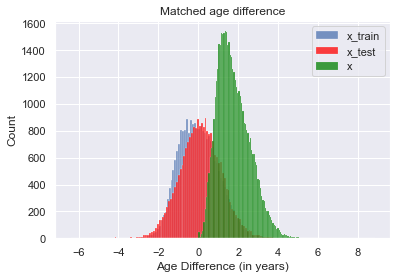

In [180]:
sns.histplot(x_train.ravel())
sns.histplot(x_transform_test.ravel(), color='red')
sns.histplot(X.ravel(), color='green')

plt.xlabel('Age Difference (in years)')
plt.title('Matched age difference')
plt.legend(labels=['x_train', 'x_test', 'x'])

plt.show()

As we can see here, when compared to the original, non normalised dataset we can see a large difference. This is good, as it means that we are now working with normalised data in the x_train and x_test datasets. 

Now that we have defined our model, we can apply it to our two features of interest - sex and group. 

In [150]:
y_asd,y_train_asd,y_test_asd, x_train_asd, x_test_asd,score_test_asd,score_train_asd = model_func(X,y,group=0)

As previously defined, group 0 is the group, meaning ASD vs. control, and group 1 is sex, meaning male vs. female, which was previously defined. 

In [149]:
y_sex,y_train_sex,y_test_sex, x_train_sex, x_test_sex, score_test_sex, score_train_sex = model_func(X,y,group=1)

With the now define models, one for group and one for sex, we can visualise the prediction using a confusion matrix. For this, we again need to download the necessary packages.

In [239]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

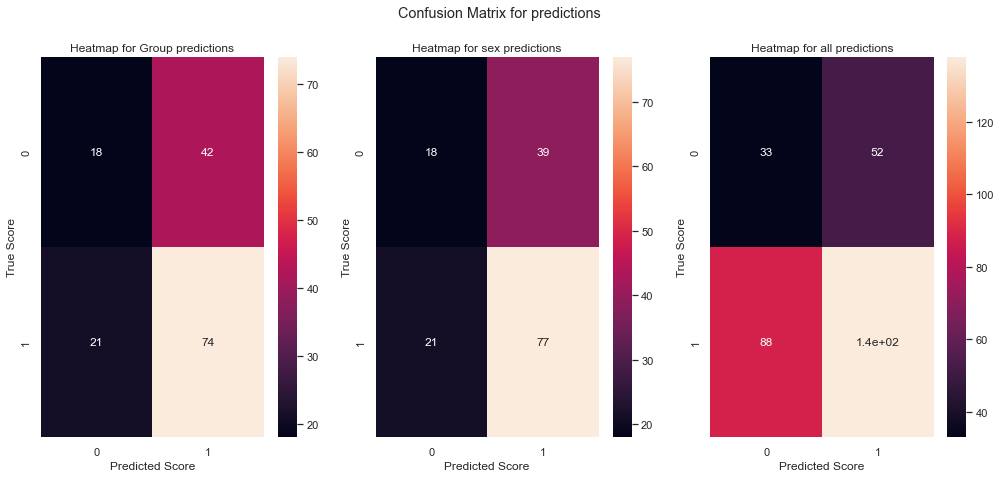

In [279]:
cm_group = confusion_matrix(y_test_asd, y_asd[155:310])
cm_sex = confusion_matrix(y_test_sex, y_sex[155:310])
cm_all = confusion_matrix(y_pred, y[:,0])

figure, axes = plt.subplots(1, 3, figsize=(17,7))

sns.heatmap(cm_group, annot = True, ax=axes[0]).set(title='Heatmap for Group predictions', ylabel='True Score', xlabel='Predicted Score');
sns.heatmap(cm_sex, annot = True, ax=axes[1]).set(title='Heatmap for sex predictions', ylabel='True Score', xlabel='Predicted Score');
sns.heatmap(cm_all, annot = True, ax=axes[2]).set(title='Heatmap for all predictions', ylabel='True Score', xlabel='Predicted Score');

figure.suptitle('Confusion Matrix for predictions');

In [231]:
import sklearn
from sklearn.metrics import precision_recall_fscore_support

In [248]:
sklearn.metrics.precision_recall_fscore_support(y[:,0], y_pred)

(array([0.38823529, 0.61061947]),
 array([0.27272727, 0.72631579]),
 array([0.32038835, 0.66346154]),
 array([121, 190]))

In [284]:
from sklearn.metrics import classification_report

In [285]:
print(classification_report(y[:,0], y_pred))

              precision    recall  f1-score   support

         1.0       0.39      0.27      0.32       121
         2.0       0.61      0.73      0.66       190

    accuracy                           0.55       311
   macro avg       0.50      0.50      0.49       311
weighted avg       0.52      0.55      0.53       311



In [286]:
print(classification_report(y_test_asd, y_asd[155:310]))

              precision    recall  f1-score   support

         1.0       0.46      0.30      0.36        60
         2.0       0.64      0.78      0.70        95

    accuracy                           0.59       155
   macro avg       0.55      0.54      0.53       155
weighted avg       0.57      0.59      0.57       155



In [287]:
print(classification_report(y_test_sex, y_sex[155:310]))

              precision    recall  f1-score   support

         1.0       0.46      0.32      0.37        57
         2.0       0.66      0.79      0.72        98

    accuracy                           0.61       155
   macro avg       0.56      0.55      0.55       155
weighted avg       0.59      0.61      0.59       155



In [301]:
score_test_asd

0.5806451612903226

high train, low test - poorly generalised, speaking of overfitting 

In [153]:
score_test_sex

0.5290322580645161

- what is chance accuracy? 50% --> model is iffy 
- why is it this way?

grid search

In [289]:
from sklearn.model_selection import GridSearchCV

In [291]:
param_grid = {'penalty': ['l1', 'l2'], 'C':np.logspace(-4, 4, 20), 'solver': ['liblinear']}
print(param_grid)

{'penalty': ['l1', 'l2'], 'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]), 'solver': ['liblinear']}


In [292]:
grid=GridSearchCV(LogisticRegression(), param_grid, cv=5, refit=True)
grid.fit(x_train_asd, y_train_asd)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [293]:
grid.best_params_

{'C': 0.23357214690901212, 'penalty': 'l2', 'solver': 'liblinear'}

In [302]:
grid_asd_test = grid.predict(x_test_asd)

In [301]:
y_test_asd

array([1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,
       2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
       1., 1.])

In [306]:
print(classification_report(y_test_asd, grid_asd_test))

              precision    recall  f1-score   support

         1.0       0.37      0.78      0.50        60
         2.0       0.52      0.15      0.23        95

    accuracy                           0.39       155
   macro avg       0.44      0.47      0.36       155
weighted avg       0.46      0.39      0.33       155



parameter tuning didnt make the model better, made it worse a bit 
tried tuning hyper parameter but it didnt make a difference 

In [374]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X_new = SelectKBest(f_classif, k=85).fit_transform(X, y[:,0])
X_new.shape

(311, 85)

picking out the best features with k=.... 
- grid search for selects 

- im ideal fall alle groß

loop with similar pipeline, loop over feature selection in steps, plot results once k fold has run, fit on training set, predict with reduced number of features for whole dataset, plot on x axis k and on y the result (accuracy from the test set, or predicted results) 
loop over k after scalar before logistic regression 

Features rausholen changes score test and score train so something is going on with features. 

- 

Support Vector Machine - add to pipeline as comment to show you know where it goes.